In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import os
import matplotlib.pyplot as plt 
from scipy import interpolate
import random
import math
import torch
import copy
import time

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyClassifier
from sklearn import metrics
from sklearn.svm import SVC

import torch
import torch.nn as nn
from torch.utils.tensorboard import SummaryWriter
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.utils.data import DataLoader, TensorDataset

import mads_dl

from PIL import Image
from IPython.display import Image
import matplotlib.cm as cm
import seaborn as sns
torch.manual_seed(1)
from classes import *
# set all columns to be displayed
pd.set_option('display.max_columns', None)

loaddata = LoadData()


2024-11-14 08:32:56.563466: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731569576.576677  637077 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731569576.581312  637077 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-14 08:32:56.594866: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Classes

## Loading Data Classes

In [2]:
# 'FA_20231206_2H_yeast_Pyruvate-d3_1.ser.csv'
# 'FA_20240517_2H_yeast_Nicotinamide-d4 _9.csv'
# 'FA_20240213_2H_yeast_Fumarate-d2_9.csv
file = str(Path('FA_20231123_2H Yeast_Fumarate-d2_12 .csv'))
substrates = loaddata.get_substrate_list(file)
metabolites = loaddata.get_metabolite_list(file)
substrates = [float(i) for i in substrates]
metabolites = [float(i) for i in metabolites]
path_list = loaddata.load_data(file)

In [3]:
print(substrates, metabolites)

[6.653, 4.7] [4.368, 2.474]


# Step 1: Loading the data

In [4]:
# shapes of all the csv files
path_list2 = loaddata.load_data('.csv')

for path in path_list2:
    df = pd.read_csv(path)
    print(df.shape)

(632, 51)
(622, 236)
(806, 151)
(1063, 51)
(837, 238)
(654, 51)
(585, 236)
(960, 131)
(855, 131)
(577, 236)
(679, 151)
(1429, 131)
(1583, 131)
(1170, 236)
(966, 51)
(1527, 131)
(841, 41)
(2003, 131)
(843, 238)
(859, 236)
(706, 131)
(1226, 131)
(880, 131)
(779, 131)
(695, 131)
(778, 51)
(636, 237)
(653, 131)
(1045, 131)
(925, 71)
(793, 236)
(718, 238)
(782, 236)
(2122, 131)
(1279, 131)
(1632, 131)
(941, 238)
(537, 236)
(1796, 101)
(890, 237)
(823, 131)
(1503, 131)
(1675, 131)
(861, 151)
(681, 236)
(1147, 51)
(755, 131)
(608, 238)
(1480, 237)
(2268, 131)
(1045, 181)
(1023, 51)
(1418, 238)
(691, 236)
(735, 131)
(655, 236)
(1139, 181)
(921, 131)
(673, 236)
(645, 238)
(1074, 131)
(908, 51)
(957, 131)
(877, 40)
(1297, 131)
(951, 131)
(1594, 131)
(799, 131)
(776, 236)
(971, 237)
(1675, 131)
(1178, 237)
(2072, 131)
(898, 51)


In [5]:
for file in path_list:
    df = pd.read_csv(file)
    print(df.shape)

(2268, 131)


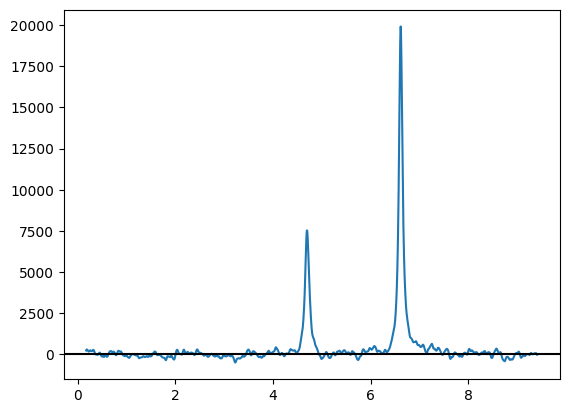

In [6]:
for i in range(len(path_list)):
    df = pd.read_csv(path_list[i])
    

    x = df.iloc[:,0]
    y = df.iloc[:, 1]

    #print(df.shape)

    plt.plot(x,y)

# show x  lines
plt.axhline(y=0, color='k')
plt.show()

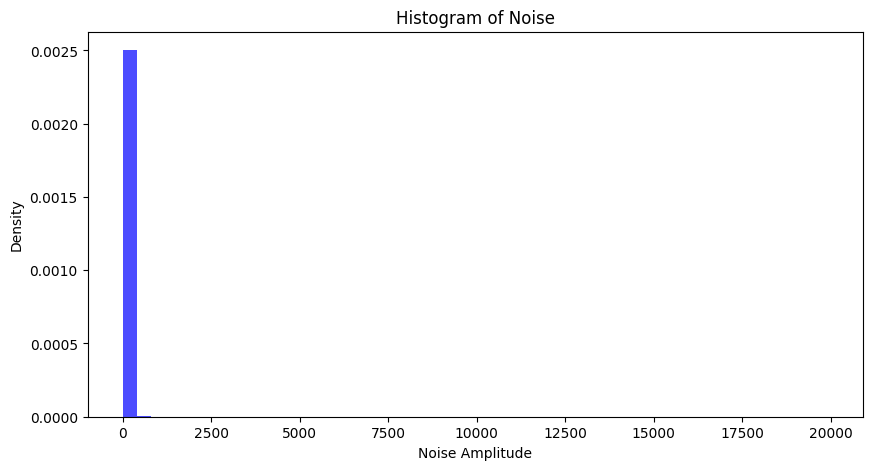

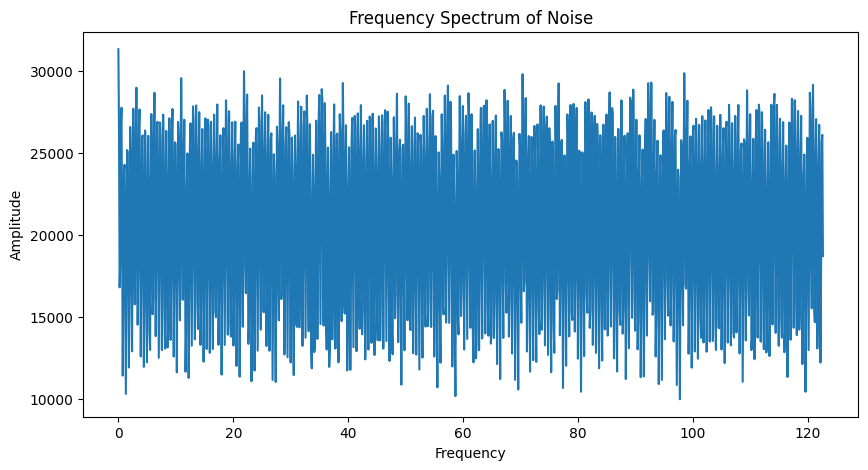

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.fft import fft, fftfreq

# Assume x_data and y_data are your data arrays
x_data = df.iloc[:,0]
y_data = df.iloc[:,1]

# Step 1: Identify Peaks and Subtract them to Isolate Noise
# Use `find_peaks` to locate main peaks, then subtract smoothed signal
peaks, _ = find_peaks(y_data, height=500)  # Adjust height to capture main peaks
smooth_signal = np.copy(y_data)
smooth_signal[peaks] = 0  # Set peaks to 0 to isolate noise around peaks

# Isolate noise by subtracting the smoothed version of the signal
noise = y_data - smooth_signal

# Step 2: Plot Histogram of Noise to Inspect Distribution
plt.figure(figsize=(10, 5))
plt.hist(noise, bins=50, density=True, alpha=0.7, color='blue')
plt.title("Histogram of Noise")
plt.xlabel("Noise Amplitude")
plt.ylabel("Density")
plt.show()

# Step 3: Perform Fourier Transform to Analyze Frequency Content of Noise
# Compute FFT
N = len(noise)
yf = fft(noise)
xf = fftfreq(N, x_data[1] - x_data[0])  # Frequency axis based on x-axis spacing

# Plot the frequency spectrum
plt.figure(figsize=(10, 5))
plt.plot(xf[:N // 2], np.abs(yf[:N // 2]))
plt.title("Frequency Spectrum of Noise")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.show()


# Step 2: Generating synthetic Data for - FA_20231113_2H_yeast_Pyruvate-d3_1.csv

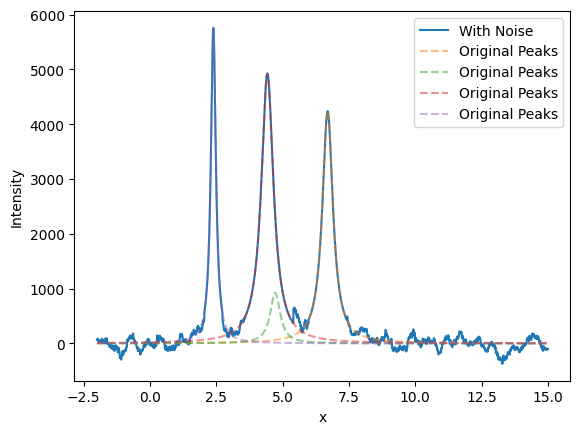

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# Lorentzian function
def lorentzian(x, x0, gamma, height):
    return height * (gamma**2 / ((x - x0)**2 + gamma**2))


def generate_random_spectrum(peak_list, spectrum_length=3000):

    # Generate random spectrum with Lorentzian peaks
    x = np.linspace(-2, 15, spectrum_length)  # x range
    y = np.zeros_like(x)          # initialize y as zeros
    mask = np.zeros_like(x)       # mask to identify peak regions

    # Add random Lorentzian peaks
    x0_parms = []
    gamma_parms = []
    height_parms = []

    x0_substrate_parms = []
    gamma_substrate_parms = []
    height_substrate_parms = []

    for peak_pos in peak_list:
        metabolism_x0 = peak_pos + np.random.uniform(-0.1, 0.1)
        
        metabolism_gamma = np.random.uniform(0.01, 0.3)  # Random width (gamma)
        metabolism_height = np.random.uniform(100, df.max().max())  # Random height
        peak_lorenz = lorentzian(x, metabolism_x0, metabolism_gamma, metabolism_height)
        y = np.maximum(y, peak_lorenz)  # Use maximum to avoid summing peaks

        # Create a mask to identify regions near the peaks (exclude noise here)
        mask += peak_lorenz > (0.1 * metabolism_height)  # Masking regions where peak height is significant

        # Append the parameters for the peak
        x0_parms.append(metabolism_x0)
        gamma_parms.append(metabolism_gamma)
        height_parms.append(metabolism_height)



    # Add noise only outside the peak regions
    random_noise_level = np.random.uniform(0, df.max().max())
    gaussian_noise = np.random.normal(0, 500, 3000)
    laplace_noise = np.random.laplace(0, 500, 3000)

    # choose random between noise1 and noise2
    noise = gaussian_noise if np.random.rand() > 0.5 else laplace_noise

    #noise = np.random.normal(10, random_noise_level, spectrum_length)

    # smooth the noise with gaussian filter
    sigma = random_noise_level /1
    #noise = gaussian_filter1d(noise, sigma=sigma)
    # rollwing window mean
    noise = np.convolve(noise, np.ones(50)/50, mode='same')
    
    
        
    y_noisy = y + noise * (mask == 0)  # Add noise only where mask is 0 (outside peaks)

    return x, y_noisy, np.array(x0_parms), np.array(gamma_parms), np.array(height_parms)


# ----

#peak_list = [2.323, 4.7, 1.201]
substrates_list = substrates + metabolites
x, y_noisy, x0_parms, gamma_parms, height_parms = generate_random_spectrum(substrates_list)

# Plot the result
plt.plot(x, y_noisy, '-', label="With Noise")

for x0, gamma, height in zip(x0_parms, gamma_parms, height_parms):
    lorentz = lorentzian(x, x0, gamma, height)
    plt.plot(x, lorentz, '--', label="Original Peaks", alpha=0.5)  
plt.xlabel('x')
plt.ylabel('Intensity')
plt.legend()
plt.show()


# Step 3: Fill Up Original Data 

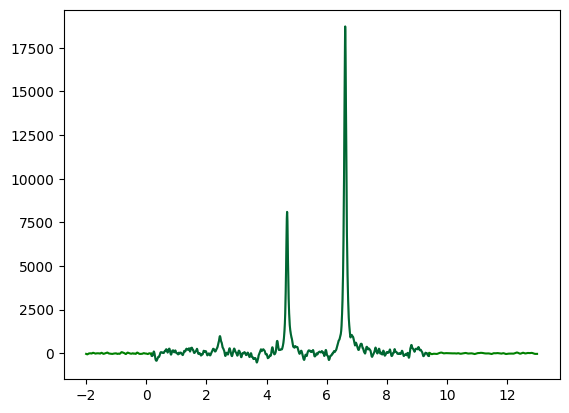

(3686, 2)


,x,y
0,-2.000000,-33.077115
1,-1.995927,-34.615232
2,-1.991855,-37.481062
3,-1.987782,-41.325352
4,-1.983710,-45.661301
...,...,...
3681,12.983526,-32.458906
3682,12.987599,-32.325666
3683,12.991671,-32.224233
3684,12.995744,-32.150077


In [9]:



def interpolate_to_shape(x_original, y_original, spectrum_lenth=3000):
    """_summary_

    # Originaldaten
    y_original = df.iloc[:, 1]
    x_original = df.iloc[:, 0]

    Args:
        df (_type_): _description_
    """


    # Neue x-Werte (stellen Sie sicher, dass diese innerhalb des Bereichs von x_original liegen)
    x_new = np.linspace(x_original.min(), x_original.max(), spectrum_lenth)

    # Interpolierte Daten
    interpolated_data = interpolate.interp1d(x_original, y_original, kind='linear')(x_new)
    
    df = pd.DataFrame({'x': x_new, 'y': interpolated_data})
    return df

def fill_df(df):
    """If Data is not ranging from -2 to 10, fill the data with noise
    
    """
    # renmame the columns
    df.columns = ['x', 'y']
    x = df.loc[:, 'x']
    y = df.loc[:, 'y']



    # Calculate the step size of the x values
    x_diff = np.diff(x)
    step = np.mean(x_diff)
    
    # Take sample range for the noise
    x_range_lower = 0
    x_range_upper = 100

    # get sample data of the noise
    x_sample = x[x_range_lower:x_range_upper]
    y_sample = y[x_range_lower:x_range_upper]

    # get the max and min values of the sample data
    y_min, y_max = (y_sample.min()), abs(y_sample.max())
    #print(y_min, y_max)

    # get the min max of the x values
    x_min, x_max = x.min(), x.min()

    if x_min > -2:


        # create values in n steps
        x_new = np.arange(-2, x.iloc[0], step)
        y_new = np.zeros_like(x_new)

        # set the noise level
        noise = np.random.normal(0, y_max, len(x_new))


        
        # smooth the noise with gaussian filter
        # Berechne die Standardabweichung der y-Daten
        sigma = len(y_new) / 100
        noise = gaussian_filter1d(input=noise, sigma=sigma)

        # replace y_new with noise
        y_new = noise

        data = pd.DataFrame({'x': x_new, 'y': y_new})
        df = pd.concat([data, df], axis=0)
        df.reset_index(drop=True, inplace=True)

    if x_max < 15:
    
        # create values in n steps
        x_new = np.arange(x.iloc[-1], 13, step)
        #print(x_new)
        y_new = np.zeros_like(x_new)

        # set the noise level
        noise = np.random.normal(0, y_max, len(x_new))

        # smooth the noise with gaussian filter
        # Berechne die Standardabweichung der y-Daten
        sigma = len(y_new) / 100
        noise = gaussian_filter1d(input=noise, sigma=sigma)

        # replace y_new with noise
        y_new = noise

        data = pd.DataFrame({'x': x_new, 'y': y_new})
        df = pd.concat([df, data], axis=0)
        df.reset_index(drop=True, inplace=True)
                
    return df


df_fill = df.iloc[:, [0, 2]]
#print(df_fill.head())
df_filled = fill_df(df_fill)
#print(df_filled.head())

# plot 
plt.plot(df_filled.iloc[:, 0], df_filled.iloc[:, 1], color='green')
plt.plot(df_fill.iloc[:, 0], df_fill.iloc[:, 1], color='blue', alpha=0.2)
plt.show()
print(df_filled.shape)
display(df_filled)

# Step 3: Bring data to same shape

(3000, 2)


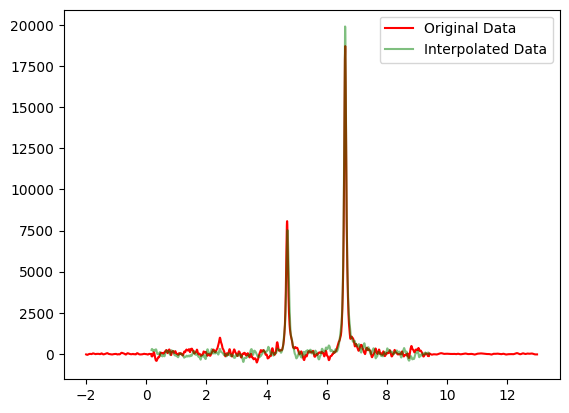

In [10]:

# Interpoliere die Werte, um die Größe des DataFrames zu erweitern
df_interpolated = interpolate_to_shape(df_filled.iloc[:, 0], df_filled.iloc[:, 1], spectrum_lenth=3000)

# Form des interpolierten DataFrames
print(df_interpolated.shape)

# Plot the interpolated data
#plt.plot(df_filled.iloc[:, 0], df_filled.iloc[:, 1])
plt.plot(df_interpolated.iloc[:, 0], df_interpolated.iloc[:, 1], color='red',)
plt.plot(df.iloc[:, 0], df.iloc[:, 1], color='green', alpha=0.5)
plt.legend(['Original Data', 'Interpolated Data', 'Sum'])
plt.show()

# Step 4: Bring Data to shape for Transformer

In [11]:
df_interpolated.shape

(3000, 2)

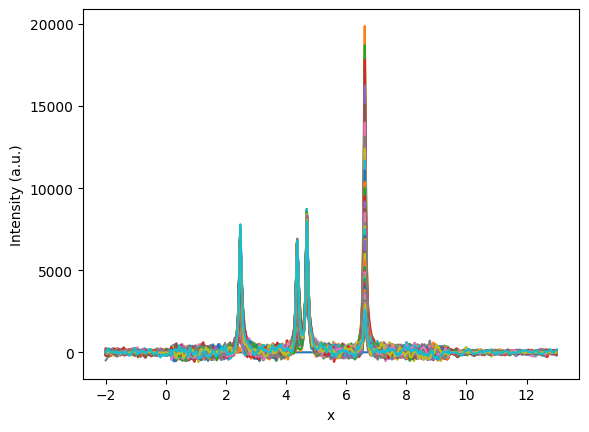

In [12]:
for i in range(df.shape[1]-1):

    df_filled = fill_df(df.iloc[:, [0, i]])
    df_interpolated = interpolate_to_shape(df_filled.loc[:,'x'], df_filled.loc[:,'y'], spectrum_lenth=3000)
    #plt.plot(df_filled.loc[:,'x'], df_filled.loc[:,'y'], '-', label='Original Data')
    plt.plot(df_interpolated.iloc[:, 0], df_interpolated.iloc[:, 1], '-', label='Interpolated Data')

# data_train_tensor & y_train
substrates_list = substrates + metabolites
x_synth, y_synth, x0_parms, gamma_parms, height_parms = generate_random_spectrum(substrates_list)


#plt.plot(x_synth, y_synth, label="With Noise")
plt.xlabel('x')
plt.ylabel('Intensity (a.u.)')

plt.show()

# Generate training Dataset 

In [13]:

num_samples = 5000

x_data = []
y_data = []
x0_parms_list = []
gamma_parms_list = []
height_parms_list = []
for i in range(num_samples):
    # data_train_tensor & y_train
    substrates_list = substrates + metabolites
    x, y_noisy, x0_parms, gamma_parms, height_parms = generate_random_spectrum(substrates_list)
    x_data.append(x)
    y_data.append(y_noisy)
    x0_parms_list.append(x0_parms)
    gamma_parms_list.append(gamma_parms)
    height_parms_list.append(height_parms)




# Umwandeln der lists in Tensoren
x_data = torch.tensor(x_data)
data = torch.tensor(y_data) # Data: Noisy Spectra which is input to the model
x_params_tensor = torch.tensor(x0_parms_list) # Target: 
gamma_params_tensor = torch.tensor(gamma_parms_list)
height_params_tensor = torch.tensor(height_parms_list)

target = torch.cat((x_params_tensor, gamma_params_tensor, height_params_tensor), dim=1)



# Überprüfen der Formen
print(f"x_data shape: {x_data.shape}")
print(f"data shape: {data.shape}")
print(f"x_params_tensor shape: {x_params_tensor.shape}")
print(f"gamma_params_tensor shape: {gamma_params_tensor.shape}")
print(f"height_params_tensor shape: {height_params_tensor.shape}")
print(f"target shape: {target.shape}")
print('\n')

x_data shape: torch.Size([5000, 3000])
data shape: torch.Size([5000, 3000])
x_params_tensor shape: torch.Size([5000, 4])
gamma_params_tensor shape: torch.Size([5000, 4])
height_params_tensor shape: torch.Size([5000, 4])
target shape: torch.Size([5000, 12])




/tmp/ipykernel_637077/809751612.py:22: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  x_data = torch.tensor(x_data)


In [14]:

def scale_data(data, target):
    """Scale the data
    
    Args:
        x_data (_type_): _description_
        y_data (_type_): _description_
    """
    # Skalieren Sie die Daten
    data_scaler = MinMaxScaler()
    target_scaler = MinMaxScaler()

    print(f'Before Scaling: {data.shape}')
    print(f'Before Scaling: {target.shape}')

    # Reshape the data before scaling
    data = data.reshape(data.shape[0], -1)
    target = target.reshape(target.shape[0], -1)

    print(f'After Reshaping: {data.shape}')
    print(f'After Reshaping: {target.shape}')

    # Skalieren Sie die x-Daten
    data_scaled = data_scaler.fit_transform(data)
    target_scaled = target_scaler.fit_transform(target)
    
    print(f'After Scaling: {data_scaled.shape}')
    print(f'After Scaling: {target_scaled.shape}')


    return data_scaled, target_scaled, data_scaler, target_scaler
    

# Skalieren Sie die Daten
data_scaled, target_scaled, data_scaler, target_scaler = scale_data(data, target)

Before Scaling: torch.Size([5000, 3000])
Before Scaling: torch.Size([5000, 12])
After Reshaping: torch.Size([5000, 3000])
After Reshaping: torch.Size([5000, 12])
After Scaling: (5000, 3000)
After Scaling: (5000, 12)


In [15]:
from sklearn.model_selection import train_test_split
import torch
from sklearn.preprocessing import MinMaxScaler
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")



# Aufteilen der Daten in Trainings- und Testsets
data_train, data_tmp, target_train, target_tmp = train_test_split(data, target, 
                                                    test_size=0.4,
                                                    shuffle=True,
                                                    random_state=1)
data_val, data_test, target_val, target_test = train_test_split(data_tmp, target_tmp,
                                                    test_size=0.5,
                                                    shuffle=True,
                                                    random_state=1)

# import StandardScaler
from sklearn.preprocessing import StandardScaler

# Skalieren der Daten
data_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

# Skalieren von data train und test
data_train_sc = data_scaler.fit_transform(data_train)
data_val_sc = data_scaler.transform(data_val)
data_test_sc = data_scaler.transform(data_test)

# Skalieren von target train und test
target_train_sc = target_scaler.fit_transform(target_train)
target_val_sc = target_scaler.transform(target_val)
target_test_sc = target_scaler.transform(target_test)


# Konvertieren in Tensoren
data_train_tensor = torch.tensor(data_train_sc, dtype=torch.float32)
data_val_tensor = torch.tensor(data_val_sc, dtype=torch.float32)
data_test_tensor = torch.tensor(data_test_sc, dtype=torch.float32)
target_train_tensor = torch.tensor(target_train_sc, dtype=torch.float32)
target_val_tensor = torch.tensor(target_val_sc, dtype=torch.float32)
target_test_tensor = torch.tensor(target_test_sc, dtype=torch.float32)





# # Reshape the tensors for the model
# target_train_tensor = target_train_tensor.reshape(target_train_tensor.shape[0], -1)
# target_val_tensor = target_val_tensor.reshape(target_val_tensor.shape[0], -1)

# Überprüfen der Tensoren
print(f"Data Train Shape: {data_train_tensor.shape}")
print(f"Data Val Shape: {data_val_tensor.shape}")
print(f"Data Test Shape: {data_test_tensor.shape}")
print(f"Target Train Shape: {target_train_tensor.shape}")
print(f"Target Val Shape: {target_val_tensor.shape}")
print(f"Target Test Shape: {target_test_tensor.shape}")

Data Train Shape: torch.Size([3000, 3000])
Data Val Shape: torch.Size([1000, 3000])
Data Test Shape: torch.Size([1000, 3000])
Target Train Shape: torch.Size([3000, 12])
Target Val Shape: torch.Size([1000, 12])
Target Test Shape: torch.Size([1000, 12])


# LSTM 

In [16]:
# class NeuralNetwork(nn.Module):
#     def __init__(self, input_size, hidden_size, output_size, dropout_prob):
#         super(NeuralNetwork, self).__init__()

#         self.reduce = nn.Linear(3000, hidden_size)

#         # Define LSTM with correct hidden size
#         self.lstm = nn.GRU(input_size=input_size, hidden_size=hidden_size, num_layers=2, batch_first=True)

#         # Fully connected layers with corrected input sizes
#         self.fc1 = nn.Sequential(
#             nn.Linear(hidden_size, 128),  # Match hidden_size with the output of LSTM
#             nn.LeakyReLU(),
#             nn.Dropout(p=dropout_prob)
#         )

#         self.fc2 = nn.Sequential(
#             nn.Linear(128, 32),
#             nn.LeakyReLU(),
#             nn.Dropout(p=dropout_prob)
#         )

#         self.fc3 = nn.Sequential(
#             nn.Linear(32, 16),
#             nn.LeakyReLU(),
#             nn.Dropout(p=dropout_prob)
#         )

#         # Output layer
#         self.output = nn.Linear(16, output_size)

#     def forward(self, x):
#         # Check shape before reducing
#         #print(f"Input shape before reduction: {x.shape}")  # For debugging
#         x = self.reduce(x)  # This should expect (batch_size, 3000)
        

#         # Reshape for LSTM input
#         x = x.reshape(x.shape[0], 1, -1)  # Reshape to (batch_size, seq_len, input_size)
#         #print(f"Shape after reduction: {x.shape}")

#         batch_size = x.shape[0]
        
#         # Initialize hidden and cell states with hidden_size instead of input_size
#         h_0 = torch.zeros(2, batch_size, hidden_size).to(x.device)
#         #c_0 = torch.zeros(2, batch_size, hidden_size).to(x.device)

#         # Pass data through LSTM
#         x, _ = self.lstm(x, (h_0))
#         x = x[:, -1, :]  # Take the output from the last time step

#         # Pass data through fully connected layers
#         x = self.fc1(x)
#         x = self.fc2(x)
#         x = self.fc3(x)

#         # Final output
#         output = self.output(x)
#         return output
    
#     def predict(self, X):
#         '''
#         Use the model to predict for the values in the test set.
#         Return the prediction
#         '''
#         model.eval()
#         with torch.no_grad():
#             return model(X)


In [17]:
print(data_train_tensor.shape, target_train_tensor.shape)

torch.Size([3000, 3000]) torch.Size([3000, 12])


# Conv1D

In [18]:
# import torch
# import torch.nn as nn

# class NeuralNetwork(nn.Module):
#     def __init__(self, input_size, hidden_size, output_size, dropout_prob):
#         super(NeuralNetwork, self).__init__()
        
#         self.firstpooling = nn.Sequential(
#             nn.AvgPool1d(kernel_size=2, stride=2, padding=0),
#             nn.Dropout(p=dropout_prob),
#             nn.LeakyReLU()
#         )
#         # Convolutional and pooling layers  
#         self.conv1 = nn.Sequential(
#             nn.Conv1d(in_channels=1, out_channels=8, kernel_size=3, stride=1, padding=1),
#             nn.LeakyReLU(),
#             nn.Dropout(p=dropout_prob),
#             nn.MaxPool1d(kernel_size=2, stride=2, padding=0)
#         )
        
        
#         self.conv2 = nn.Sequential(
#             nn.Conv1d(in_channels=8, out_channels=8, kernel_size=3, stride=1, padding=1),
#             nn.LeakyReLU(),
#             nn.Dropout(p=dropout_prob),
#             nn.MaxPool1d(kernel_size=2, stride=2, padding=0)
#         )
        

#         # Fully connected layers
#         self.fc1 = nn.Sequential(
#             nn.Linear(3000, 1000),  # Adjust for pooling effects
#             nn.LeakyReLU(),
#             nn.Dropout(p=dropout_prob)
#         )

#         self.fc2 = nn.Sequential(
#             nn.Linear(1000, 128),
#             nn.LeakyReLU(),
#             nn.Dropout(p=dropout_prob)
#         )

#         self.fc3 = nn.Sequential(
#             nn.Linear(3000, 32),
#             nn.LeakyReLU(),
#             nn.Dropout(p=dropout_prob)
#         )

#         # Output layer
#         self.output = nn.Linear(32, output_size)

#     def forward(self, x):
#         # Apply convolutional layers with pooling
        
#         x = x.unsqueeze(1)
#         x = self.firstpooling(x)
#         x = self.conv1(x)      
#         x = self.conv2(x)  

#         #print(x.shape)
#         # Flatten the output for fully connected layers
#         x = x.reshape(x.shape[0], -1)        
#         # Pass through fully connected layers
#         # x = self.fc1(x)
#         # x = self.fc2(x)
#         x = self.fc3(x)

#         # Output layer
#         output = self.output(x)
#         return output

#     def predict(self, X):
#         self.eval()
#         with torch.no_grad():
#             return self(X)


In [19]:
# import torch
# import torch.nn as nn
# import math

# class NeuralNetwork(nn.Module):
#     def __init__(self, 
#                  input_size=3000, 
#                  hidden_size=128, 
#                  output_size=27, 
#                  dropout_prob=0.2,
#                  avgpool_kernel_size=2,
#                  avgpool_stride=2,
#                  avgpool_padding=0,

#                  conv1_in_channels=1,
#                  conv1_out_channels=8,
#                  conv1_kernel_size=3,
#                  conv1_stride=1,
#                  conv1_padding=1,

#                  conv2_in_channels=8,
#                  conv2_out_channels=12,
#                  conv2_kernel_size=3,
#                  conv2_stride=1,
#                  conv2_padding=1,
#                  fc1_out_features=128,
                
#                  fc3_out_features=32):
#         super(NeuralNetwork, self).__init__()
        
#         # Pooling and activation
#         self.firstpooling = nn.Sequential(
#             nn.AvgPool1d(kernel_size=avgpool_kernel_size, stride=avgpool_stride, padding=avgpool_padding),
#             nn.Dropout(p=dropout_prob),
#             nn.LeakyReLU()
#         )

#         # Convolutional and pooling layers  
#         self.conv1 = nn.Sequential(
#             nn.Conv1d(in_channels=conv1_in_channels, out_channels=conv1_out_channels, 
#                       kernel_size=conv1_kernel_size, stride=conv1_stride, padding=conv1_padding),
#             nn.LeakyReLU(),
#             nn.Dropout(p=dropout_prob),
#             nn.MaxPool1d(kernel_size=2, stride=2, padding=0)
#         )

#         # self.conv2 = nn.Sequential(
#         #     nn.Conv1d(in_channels=conv1_out_channels, out_channels=conv2_out_channels, 
#         #               kernel_size=conv2_kernel_size, stride=conv2_stride, padding=conv2_padding),
#         #     nn.LeakyReLU(),
#         #     nn.Dropout(p=dropout_prob),
#         #     nn.MaxPool1d(kernel_size=2, stride=2, padding=0)
#         # )

#         # Compute output size after convolution and pooling
#         def compute_output_size(input_len, kernel_size, stride, padding, layers=1):
#             for _ in range(layers):
#                 input_len = math.floor((input_len + 2 * padding - (kernel_size - 1) - 1) / stride + 1)
#             return input_len

#         pooled_size = compute_output_size(input_size, avgpool_kernel_size, avgpool_stride, avgpool_padding)
#         conv1_size = compute_output_size(pooled_size, conv1_kernel_size, conv1_stride, conv1_padding)
#         conv1_pooled = math.floor(conv1_size / 2)  # Max pooling halves the size
#         conv2_size = compute_output_size(conv1_pooled, conv2_kernel_size, conv2_stride, conv2_padding)
#         conv2_pooled = math.floor(conv2_size / 2)  # Max pooling halves the size again

#         flattened_size = conv1_out_channels * conv1_pooled

#         # # Fully connected layers
#         # self.fc1 = nn.Sequential(
#         #     nn.Linear(flattened_size, fc1_out_features),
#         #     nn.LeakyReLU(),
#         #     nn.Dropout(p=dropout_prob)
#         # )

#         self.fc2 = nn.Sequential(
#             nn.Linear(flattened_size, fc3_out_features),
#             nn.LeakyReLU(),
#             nn.Dropout(p=dropout_prob)
#         )

#         # Output layer
#         self.output = nn.Linear(fc3_out_features, output_size)

#     def forward(self, x):
#         x = x.unsqueeze(1)  # Add channel dimension
#         x = self.firstpooling(x)
#         x = self.conv1(x)
#         #x = self.conv2(x)
#         x = x.reshape(x.shape[0], -1)  # Flatten
#         #x = self.fc1(x)
#         x = self.fc2(x)
#         output = self.output(x)

#         return output

#     def predict(self, X):
#         self.eval()
#         with torch.no_grad():
#             return self(X)

# Linear Layer

In [20]:
class NeuralNetwork(nn.Module):
    
    def __init__(self, 
                 input_size=3000, 
                 fc1_output=512, 
                 output_size=len(substrates_list) * 3, 
                 dropout_prob=0.1,
                 kernel_size=2,
                 stride=1,
                 padding=1
                 ):
        

        super(NeuralNetwork, self).__init__()

        self.pooling = nn.Sequential(
            nn.AvgPool1d(kernel_size=kernel_size, stride=stride, padding=padding)
        )
        reduced_size = (input_size + 2 * padding - kernel_size) // stride + 1
        self.fc1 = nn.Sequential(
            nn.Linear(reduced_size, fc1_output),
            nn.LeakyReLU(),
            nn.Dropout(p=dropout_prob)
        )


        # Output layer
        self.output = nn.Linear(fc1_output, output_size)

    def forward(self, x):
        x = self.pooling(x)

        x = self.fc1(x)
        output = self.output(x)
        return output

    def predict(self, X):
        self.eval()
        with torch.no_grad():
            return self(X)

# Training

In [21]:

def calculate_mse_of_real_data(df, model, random=True, i = 3, tensor=False):

    """
    e.g. df: df.iloc[:, [0, 1]]
    """

    if random:
        i = np.random.randint(1, df.shape[1])

    # fill the data
    df_fill = fill_df(df.iloc[:, [0, i]])

    # interpolate the data
    df_interpolated = interpolate_to_shape(df_fill.iloc[:, 0], df_fill.iloc[:, 1], spectrum_lenth=3000)
    #display(df_interpolated)
    x_real = df_interpolated.loc[:, 'x']
    y_real = df_interpolated.loc[:, 'y']

    # scale the data
    y_real_sc = data_scaler.transform(y_real.values.reshape(1, -1))


    # convert to tensor
    y_real_tensor = torch.tensor(y_real_sc, dtype=torch.float32).to(device)

    # predict the data
    target_real_pred = model.predict(y_real_tensor)

    if tensor == True:
        print(target_real_pred)

    # bring the data back to the cpu
    target_real_pred_cpu = target_real_pred.cpu().detach().numpy()

    # rescale the data
    target_real_pred_rescaled = target_scaler.inverse_transform(target_real_pred_cpu)

    # reshape the data
    target_real_pred = target_real_pred_rescaled.reshape(target_real_pred_rescaled.shape[0], -1)

    x0_parms_real, gamma_parms_real, height_parms_real = np.split(target_real_pred, 3, axis=1)

        

    # Put the Lorenz functions in a Dataframe
    lorentz_list = []
    lorentz_df = pd.DataFrame({'x': x_real})  # Initialize DataFrame with x_real

    for i, (x0, gamma, height) in enumerate(zip(x0_parms_real[0], gamma_parms_real[0], height_parms_real[0])):
        lorentz = lorentzian(x_real, x0, gamma, height)
        column_name = f'lorentz_{i}'  # Dynamically generate a unique column name
        lorentz_df = pd.concat([lorentz_df, pd.DataFrame({column_name: lorentz})], axis=1)

    # add another column which takes the np.maximum of the columns
    lorentz_df['max'] = lorentz_df.iloc[:, 1:].max(axis=1)
    #display(lorentz_df)

    # calculate the mse between the real data and lorentz_df
    mse = mean_squared_error(y_real, lorentz_df['max'])
    return mse

In [22]:
def calculate_mse_of_real_data_loss(df, model, random=True, i=3, tensor=False, device='cpu'):
    """
    Calculate MSE of real data, ensuring it can be used for backpropagation.
    """
    if random:
        i = np.random.randint(1, df.shape[1])

    # Fill the data
    df_fill = fill_df(df.iloc[:, [0, i]])

    # Interpolate the data
    df_interpolated = interpolate_to_shape(df_fill.iloc[:, 0], df_fill.iloc[:, 1], spectrum_lenth=3000)
    x_real = torch.tensor(df_interpolated['x'].values, dtype=torch.float32, device=device)
    y_real = torch.tensor(df_interpolated['y'].values, dtype=torch.float32, device=device)

    # Scale the data
    y_real_scaled = torch.from_numpy(data_scaler.transform(y_real.unsqueeze(0).cpu().numpy())).float().to(device)
    y_real_scaled.requires_grad_(True)

    # Predict the data
    target_real_pred = model(y_real_scaled)

    # Rescale predictions (preserve graph)
    target_real_pred_rescaled = torch.from_numpy(
        target_scaler.inverse_transform(target_real_pred.cpu().detach().numpy())
    ).float().to(device)

    # Split the predictions
    x0_parms_real, gamma_parms_real, height_parms_real = torch.split(
        target_real_pred_rescaled, target_real_pred_rescaled.shape[1] // 3, dim=1
    )

    # Compute Lorentzian functions
    lorentz_list = []
    for x0, gamma, height in zip(x0_parms_real[0], gamma_parms_real[0], height_parms_real[0]):
        lorentz = lorentzian(x_real, x0, gamma, height)  # Assume lorentzian returns a PyTorch tensor
        lorentz_list.append(lorentz)

    # Stack Lorentzian columns and compute maximum
    lorentz_tensor = torch.stack(lorentz_list, dim=1)
    max_lorentz = torch.max(lorentz_tensor, dim=1).values

    # Compute MSE using PyTorch
    mse = torch.nn.functional.mse_loss(max_lorentz, y_real)

    if tensor:
        print("MSE Tensor:", mse)

    return mse


In [23]:


# ------------------------------------
import torch

def get_model_size(model):
    total_params = sum(p.numel() for p in model.parameters())
    size_in_bytes = total_params * 4  # Assuming 32-bit (4 bytes) floats
    size_in_megabytes = size_in_bytes / (1024 ** 2)  # Convert to MB
    return total_params, size_in_megabytes


df = pd.read_csv(path_list[0]) 

dropout_results = [] # storing the results of the dropout experiment
optuna_results = [] # storing the results of the optuna experiment

def training(model, X_train, y_train, X_val, y_val, criterion, optimizer, epochs, writer, batch_size=64, patience=20, dropout_prob=0.5, log_tensorboard=True, verbose=True, check_real_data=False):

    # Set device to GPU if available
    if torch.cuda.is_available():
        device = torch.device('cuda')
    else:
        device = torch.device('cpu')

   # device = torch.device('cpu')

    # Move data and model to device
    X_train, y_train, X_val, y_val = X_train.to(device), y_train.to(device), X_val.to(device), y_val.to(device)
    model.to(device)

    # Initialize best metrics and model
    best_eval_metric_val = float('inf') # Initialize the best_eval_metric
    best_val_loss = float('inf') # Initialize the best_val_loss
    best_real_metric_val = float('inf')
    best_model = copy.deepcopy(model.state_dict()) # Initialize the best_model
    patience_counter_loss = 0  # Early stopping counter
    patience_counter_metric = 0  # Early stopping counter

    # DataLoader for batching
    train_dataset = TensorDataset(X_train, y_train)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)


    # Scheduler for learning rate adjustment (if val_loss does not improve for 'patience' epochs)
    scheduler = ReduceLROnPlateau(optimizer, mode='min', patience=3, factor=0.5)
    train_losses, val_losses = [], [] # to visualize the drop_out_prob
    train_accuracies, val_accuracies = [], []
    real_accuracies = []
    # Training Loop
    for epoch in range(epochs):
        model.train()
        epoch_loss = 0

        # Training loop
        for data, target in train_loader:
            data, target = data.to(device), target.to(device)

            
            
            #print(data.shape, target.shape)
            optimizer.zero_grad()  # Clear gradients
            outputs = model(data)  # Forward pass
            #loss = criterion(outputs.squeeze(1), target)  # Calculate loss

            # FOR LSTM
            loss = criterion(outputs, target)  # Calculate loss # For LSTM
            #print(loss)
            #loss_real = calculate_mse_of_real_data_loss(df, model, random=True, tensor=True, device=device)
            
            loss.backward()  # Backpropagation
            optimizer.step()  # Update weights

            epoch_loss += loss # Accumulate batch loss

        # Validation
        model.eval()
        with torch.no_grad():
            
            val_outputs = model(X_val)  # Forward pass
            #loss_val = criterion(val_outputs.squeeze(1), y_val)
            # FOR LSTM
            loss_val = criterion(val_outputs, y_val)
            scheduler.step(loss_val)  # Adjust learning rate based on loss
            
            # calculate the training mase
            predictions_train = model.predict(X_train)
            
            mse_train = mean_squared_error(y_train.cpu(), predictions_train.cpu().squeeze(1))

            # Calculate validation mase
            predictions_val = model.predict(X_val)
            mse_val = mean_squared_error(y_val.cpu(), predictions_val.cpu().squeeze(1))

            # Calculate the mse of real data
            mse_real = calculate_mse_of_real_data(df, model, random=True)


            # Log to TensorBoard
            if log_tensorboard:
              writer.add_scalars("Loss", {"train": epoch_loss / len(train_loader), 'val': loss_val}, epoch)
              writer.add_scalars("MSE", {"train": mse_train, "val": mse_val}, epoch)
              writer.add_scalars("MSE/Real Data", {"MSE": mse_real}, epoch)
              writer.flush()

            # Early stopping if loss_val is increasing
            if loss_val < best_val_loss:
                best_val_loss = loss_val  # Update best val_loss
                patience_counter_loss = 0  # Reset patience counter
            else:
                patience_counter_loss += 1  # Increment if no improvement

            # Early Stopping based on if val_mse is not increasing
            if mse_val < best_eval_metric_val:
                best_eval_metric_val = mse_val
                #best_model = copy.deepcopy(model.state_dict()) # saves the best model where the rmse_val is highest
                patience_counter_metric_val = 0  # Reset patience counter if improved
            else:
                patience_counter_metric_val += 1

            # early stopping if real_mse is increasing
            if mse_real < best_real_metric_val:
                best_real_metric_val = mse_real
                best_model = copy.deepcopy(model.state_dict()) # saves the best model where the rmse_val is highest
            else:
                patience_counter_metric += 1



            # Early stopping check
            if (patience_counter_loss >= patience) or (patience_counter_metric >= patience):
                print(f"Early stopping at epoch {epoch+1}")
                break


        # Print status
        if verbose:
          if epoch % 19 == 0:
            print(f"| Epoch {epoch+1} | Train Loss: {epoch_loss / len(train_loader):.4f}, Validation Loss: {loss_val:.4f} | Train MSE: {mse_train:.4f}, Val MSE: {mse_val:.4f} |")

        if check_real_data:
            train_losses.append(epoch_loss / len(train_loader))
            val_losses.append(loss_val)
            train_accuracies.append(mse_train)
            val_accuracies.append(mse_val)
            real_accuracies.append(mse_real)

            
            optuna_results.append({'dropout_prob': dropout_prob,
                                    'train_loss': train_losses,
                                    'val_loss': val_losses,
                                    'training_MSE': train_accuracies,
                                    'validation_MSE': val_accuracies,
                                    'real_data_MSE': mse_real
                                    })

            


    dropout_results.append({'dropout_prob': dropout_prob,
                                    'train_loss': train_losses,
                                    'val_loss': val_losses,
                                    'training_MSE': train_accuracies,
                                    'validation_MSE': val_accuracies
                                    })
    # Load the best model
    model.load_state_dict(best_model)
    print(f"Best validation MSE: {best_eval_metric_val:.4f}")
    if check_real_data:
        print(f'MSE Real Data: {mse_real}')

    writer.close()
    return model, optuna_results




#%tensorboard --logdir=runs


# Data preparation: ensure data shapes are correct
data_train_tensor = data_train_tensor.reshape(-1, 3000)  # Assuming original shape is (num_samples, 3000)
data_val_tensor = data_val_tensor.reshape(-1, 3000)

# Check shapes before training
print("Train shape:", data_train_tensor.shape)
print("Validation shape:", data_val_tensor.shape)

# #Define model with correct input size
# input_size = 3000
# hidden_size = 512
# output_size = len(substrates_list) * 3
# dropout_prob = 0.1
# learning_rate = 0.000001
# epochs = 10

# model = NeuralNetwork().to(device)
# model_size, model_size_mb = get_model_size(model)
# print(f'Total parameters: {model_size}')
# print(f'Model size: {model_size_mb:.2f} MB')

# optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
# criterion = torch.nn.MSELoss()

# writer = SummaryWriter()

# trained_model, _ = training(model=model,
#                          X_train=data_train_tensor,
#                          y_train=target_train_tensor,
#                          X_val=data_val_tensor,
#                          y_val=target_val_tensor,
#                          criterion=criterion,
#                          optimizer=optimizer,
#                          epochs=epochs,
#                          writer=writer,
#                          dropout_prob=dropout_prob,
#                          log_tensorboard=False,
#                          verbose=True,
#                          check_real_data=True)


Train shape: torch.Size([3000, 3000])
Validation shape: torch.Size([1000, 3000])


# Optuna


In [24]:
import optuna
import gc

def objective(trial):
    # Suggest hyperparameters
    dropout_prob = trial.suggest_float('dropout_prob', 0.1, 0.99, step=0.01)
    learning_rate = trial.suggest_float('learning_rate', 1e-6, 1e-2, log=True)
    batch_size = trial.suggest_int('batch_size', 4, 1024, step=4)
    fc1_output = trial.suggest_int('fc1_output', 1, 1000, step=1)

    kernel_size = trial.suggest_int('kernel_size',20, 150, step=1)
    stride = trial.suggest_int('stride',1, 10, step=1)
    padding = trial.suggest_int('padding',1, 10, step=1)
    
    # Initialize model and optimizer
    model = NeuralNetwork(
        input_size=3000, 
        fc1_output=fc1_output, 
        output_size=len(substrates_list) * 3, 
        dropout_prob=dropout_prob,
        kernel_size=kernel_size,
        stride=stride,
        padding = padding
    ).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    criterion = torch.nn.MSELoss()
    writer = SummaryWriter(log_dir=f"runs/trial_{trial.number}")
    
    try:
        # Train the model
        trained_model, optuna_results = training(
            model=model,
            X_train=data_train_tensor,
            y_train=target_train_tensor,
            X_val=data_val_tensor,
            y_val=target_val_tensor,
            criterion=criterion,
            optimizer=optimizer,
            epochs=1000,
            writer=writer,
            dropout_prob=dropout_prob,
            log_tensorboard=False,
            verbose=False,
            check_real_data=True,
            batch_size=batch_size
        )
        
        mse_val = optuna_results[-1]['real_data_MSE']
        
    finally:
        # Cleanup
        writer.close()
        del model, optimizer
        torch.cuda.empty_cache()
        gc.collect()
    
    return mse_val


study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=200)  # Run for 20 trials (adjust as needed)


/home/generalpegasus/Documents/VirtualEnvirnoments/.main/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2024-11-14 08:33:16,499] A new study created in memory with name: no-name-38b03600-f78d-4bf1-9e3f-924d0ec11cd0
[I 2024-11-14 08:33:18,397] Trial 0 finished with value: 1814840.905335849 and parameters: {'dropout_prob': 0.42000000000000004, 'learning_rate': 0.002760569996796462, 'batch_size': 532, 'fc1_output': 993, 'kernel_size': 43, 'stride': 2, 'padding': 4}. Best is trial 0 with value: 1814840.905335849.


Early stopping at epoch 21
Best validation MSE: 0.0511
MSE Real Data: 1352027.821242751


[I 2024-11-14 08:33:19,208] Trial 1 finished with value: 664007.9176875151 and parameters: {'dropout_prob': 0.6799999999999999, 'learning_rate': 0.0007199235061255867, 'batch_size': 668, 'fc1_output': 31, 'kernel_size': 82, 'stride': 8, 'padding': 9}. Best is trial 1 with value: 664007.9176875151.


Early stopping at epoch 24
Best validation MSE: 0.0810
MSE Real Data: 632055.5682238957


[I 2024-11-14 08:33:20,609] Trial 2 finished with value: 610535.4227662579 and parameters: {'dropout_prob': 0.6799999999999999, 'learning_rate': 1.2355072705195232e-06, 'batch_size': 324, 'fc1_output': 813, 'kernel_size': 77, 'stride': 2, 'padding': 9}. Best is trial 2 with value: 610535.4227662579.


Early stopping at epoch 34
Best validation MSE: 0.1072
MSE Real Data: 644173.7120895986


[I 2024-11-14 08:33:21,396] Trial 3 finished with value: 1178036.843475333 and parameters: {'dropout_prob': 0.9, 'learning_rate': 4.957344953551383e-05, 'batch_size': 800, 'fc1_output': 895, 'kernel_size': 107, 'stride': 10, 'padding': 7}. Best is trial 2 with value: 610535.4227662579.


Early stopping at epoch 25
Best validation MSE: 0.0783
MSE Real Data: 911674.5379267943


[I 2024-11-14 08:33:22,315] Trial 4 finished with value: 821898.3552646154 and parameters: {'dropout_prob': 0.6799999999999999, 'learning_rate': 1.5790887904610835e-06, 'batch_size': 304, 'fc1_output': 662, 'kernel_size': 40, 'stride': 10, 'padding': 1}. Best is trial 2 with value: 610535.4227662579.


Early stopping at epoch 23
Best validation MSE: 0.2687
MSE Real Data: 762574.7045454874


[I 2024-11-14 08:33:23,302] Trial 5 finished with value: 365185.5173529272 and parameters: {'dropout_prob': 0.98, 'learning_rate': 0.0001648034332033169, 'batch_size': 800, 'fc1_output': 407, 'kernel_size': 56, 'stride': 1, 'padding': 5}. Best is trial 5 with value: 365185.5173529272.


Early stopping at epoch 26
Best validation MSE: 0.1370
MSE Real Data: 354708.159886633


[I 2024-11-14 08:33:24,466] Trial 6 finished with value: 1091067.8586557498 and parameters: {'dropout_prob': 0.78, 'learning_rate': 1.3786090122987916e-05, 'batch_size': 228, 'fc1_output': 655, 'kernel_size': 83, 'stride': 5, 'padding': 6}. Best is trial 5 with value: 365185.5173529272.


Early stopping at epoch 25
Best validation MSE: 0.0716
MSE Real Data: 987351.2511343051


[I 2024-11-14 08:33:25,694] Trial 7 finished with value: 1684591.4815589269 and parameters: {'dropout_prob': 0.30000000000000004, 'learning_rate': 9.005674339847204e-06, 'batch_size': 272, 'fc1_output': 339, 'kernel_size': 134, 'stride': 5, 'padding': 9}. Best is trial 5 with value: 365185.5173529272.


Early stopping at epoch 28
Best validation MSE: 0.0738
MSE Real Data: 1558071.2057825397


[I 2024-11-14 08:33:27,222] Trial 8 finished with value: 411102.2252517068 and parameters: {'dropout_prob': 0.74, 'learning_rate': 0.004531349819561561, 'batch_size': 292, 'fc1_output': 930, 'kernel_size': 27, 'stride': 10, 'padding': 9}. Best is trial 5 with value: 365185.5173529272.


Early stopping at epoch 38
Best validation MSE: 0.0418
MSE Real Data: 439059.3092935858


[I 2024-11-14 08:33:28,234] Trial 9 finished with value: 789536.1261231524 and parameters: {'dropout_prob': 0.98, 'learning_rate': 3.238552494737602e-05, 'batch_size': 296, 'fc1_output': 148, 'kernel_size': 34, 'stride': 3, 'padding': 6}. Best is trial 5 with value: 365185.5173529272.


Early stopping at epoch 24
Best validation MSE: 0.2570
MSE Real Data: 766063.3525393637


[I 2024-11-14 08:33:29,346] Trial 10 finished with value: 389210.2226178255 and parameters: {'dropout_prob': 0.11, 'learning_rate': 0.00024680316675865374, 'batch_size': 988, 'fc1_output': 391, 'kernel_size': 60, 'stride': 1, 'padding': 3}. Best is trial 5 with value: 365185.5173529272.


Early stopping at epoch 26
Best validation MSE: 0.0457
MSE Real Data: 403631.8841943639


[I 2024-11-14 08:33:30,631] Trial 11 finished with value: 433865.0277305607 and parameters: {'dropout_prob': 0.1, 'learning_rate': 0.00022361348282978053, 'batch_size': 980, 'fc1_output': 377, 'kernel_size': 61, 'stride': 1, 'padding': 3}. Best is trial 5 with value: 365185.5173529272.


Early stopping at epoch 32
Best validation MSE: 0.0435
MSE Real Data: 410635.86368564225


[I 2024-11-14 08:33:31,490] Trial 12 finished with value: 1778094.999698724 and parameters: {'dropout_prob': 0.14, 'learning_rate': 0.00029157085345814194, 'batch_size': 996, 'fc1_output': 449, 'kernel_size': 59, 'stride': 4, 'padding': 3}. Best is trial 5 with value: 365185.5173529272.


Early stopping at epoch 22
Best validation MSE: 0.0559
MSE Real Data: 1865890.025583477


[I 2024-11-14 08:33:32,360] Trial 13 finished with value: 1489681.2567236342 and parameters: {'dropout_prob': 0.48, 'learning_rate': 0.001032808971800996, 'batch_size': 816, 'fc1_output': 254, 'kernel_size': 109, 'stride': 1, 'padding': 1}. Best is trial 5 with value: 365185.5173529272.


Early stopping at epoch 21
Best validation MSE: 0.0645
MSE Real Data: 1571764.290967027


[I 2024-11-14 08:33:33,155] Trial 14 finished with value: 1490667.745514952 and parameters: {'dropout_prob': 0.30000000000000004, 'learning_rate': 0.00017215101699689082, 'batch_size': 852, 'fc1_output': 556, 'kernel_size': 59, 'stride': 7, 'padding': 3}. Best is trial 5 with value: 365185.5173529272.


Early stopping at epoch 22
Best validation MSE: 0.0606
MSE Real Data: 1496821.2036330767


[I 2024-11-14 08:33:34,064] Trial 15 finished with value: 803206.9282287863 and parameters: {'dropout_prob': 0.56, 'learning_rate': 0.0007873497450228413, 'batch_size': 648, 'fc1_output': 260, 'kernel_size': 99, 'stride': 3, 'padding': 5}. Best is trial 5 with value: 365185.5173529272.


Early stopping at epoch 24
Best validation MSE: 0.0545
MSE Real Data: 669263.1172398647


[I 2024-11-14 08:33:36,781] Trial 16 finished with value: 706881.5021938173 and parameters: {'dropout_prob': 0.25, 'learning_rate': 4.4228766693607165e-05, 'batch_size': 40, 'fc1_output': 539, 'kernel_size': 68, 'stride': 1, 'padding': 7}. Best is trial 5 with value: 365185.5173529272.


Early stopping at epoch 25
Best validation MSE: 0.0324
MSE Real Data: 731390.7763517285


[I 2024-11-14 08:33:37,566] Trial 17 finished with value: 1246878.1039526872 and parameters: {'dropout_prob': 0.88, 'learning_rate': 9.208027926505775e-05, 'batch_size': 920, 'fc1_output': 680, 'kernel_size': 21, 'stride': 7, 'padding': 4}. Best is trial 5 with value: 365185.5173529272.


Early stopping at epoch 23
Best validation MSE: 0.0759
MSE Real Data: 1968158.447476982


[I 2024-11-14 08:33:38,388] Trial 18 finished with value: 2049157.1330252562 and parameters: {'dropout_prob': 0.55, 'learning_rate': 0.007568453345989611, 'batch_size': 724, 'fc1_output': 433, 'kernel_size': 47, 'stride': 3, 'padding': 2}. Best is trial 5 with value: 365185.5173529272.


Early stopping at epoch 22
Best validation MSE: 0.0676
MSE Real Data: 2017117.7868667534


[I 2024-11-14 08:33:39,196] Trial 19 finished with value: 806403.8443613265 and parameters: {'dropout_prob': 0.4, 'learning_rate': 0.0018414820855800385, 'batch_size': 536, 'fc1_output': 123, 'kernel_size': 50, 'stride': 2, 'padding': 5}. Best is trial 5 with value: 365185.5173529272.


Early stopping at epoch 21
Best validation MSE: 0.0568
MSE Real Data: 840641.976479262


[I 2024-11-14 08:33:40,044] Trial 20 finished with value: 695848.4423602904 and parameters: {'dropout_prob': 0.2, 'learning_rate': 6.959266348818765e-06, 'batch_size': 1020, 'fc1_output': 263, 'kernel_size': 149, 'stride': 4, 'padding': 4}. Best is trial 5 with value: 365185.5173529272.


Early stopping at epoch 24
Best validation MSE: 0.2558
MSE Real Data: 770152.2981011211


[I 2024-11-14 08:33:40,914] Trial 21 finished with value: 1693925.225291107 and parameters: {'dropout_prob': 0.78, 'learning_rate': 0.008004622003191561, 'batch_size': 424, 'fc1_output': 752, 'kernel_size': 22, 'stride': 9, 'padding': 7}. Best is trial 5 with value: 365185.5173529272.


Early stopping at epoch 22
Best validation MSE: 0.0634
MSE Real Data: 1854269.5820133174


[I 2024-11-14 08:33:42,312] Trial 22 finished with value: 1722448.3861476036 and parameters: {'dropout_prob': 0.97, 'learning_rate': 0.0004738355597345608, 'batch_size': 88, 'fc1_output': 516, 'kernel_size': 33, 'stride': 6, 'padding': 8}. Best is trial 5 with value: 365185.5173529272.


Early stopping at epoch 21
Best validation MSE: 0.0791
MSE Real Data: 1948944.0262754878


[I 2024-11-14 08:33:43,469] Trial 23 finished with value: 905174.7054097704 and parameters: {'dropout_prob': 0.82, 'learning_rate': 0.00274954285923372, 'batch_size': 420, 'fc1_output': 356, 'kernel_size': 30, 'stride': 8, 'padding': 10}. Best is trial 5 with value: 365185.5173529272.


Early stopping at epoch 30
Best validation MSE: 0.0514
MSE Real Data: 1167156.7793353861


[I 2024-11-14 08:33:45,213] Trial 24 finished with value: 603384.1963275516 and parameters: {'dropout_prob': 0.64, 'learning_rate': 9.32968890209676e-05, 'batch_size': 148, 'fc1_output': 621, 'kernel_size': 74, 'stride': 4, 'padding': 2}. Best is trial 5 with value: 365185.5173529272.


Early stopping at epoch 33
Best validation MSE: 0.0435
MSE Real Data: 599025.4521872633


[I 2024-11-14 08:33:46,378] Trial 25 finished with value: 2165589.748102588 and parameters: {'dropout_prob': 0.86, 'learning_rate': 0.001663789153592349, 'batch_size': 872, 'fc1_output': 983, 'kernel_size': 96, 'stride': 1, 'padding': 5}. Best is trial 5 with value: 365185.5173529272.


Early stopping at epoch 24
Best validation MSE: 0.0750
MSE Real Data: 2417711.446894539


[I 2024-11-14 08:33:47,222] Trial 26 finished with value: 1597270.288858648 and parameters: {'dropout_prob': 0.78, 'learning_rate': 0.0003392721701686122, 'batch_size': 732, 'fc1_output': 449, 'kernel_size': 51, 'stride': 6, 'padding': 10}. Best is trial 5 with value: 365185.5173529272.


Early stopping at epoch 22
Best validation MSE: 0.0602
MSE Real Data: 2483699.794592062


[I 2024-11-14 08:33:48,188] Trial 27 finished with value: 1560863.980330635 and parameters: {'dropout_prob': 0.62, 'learning_rate': 1.8535684289358085e-05, 'batch_size': 932, 'fc1_output': 801, 'kernel_size': 70, 'stride': 2, 'padding': 6}. Best is trial 5 with value: 365185.5173529272.


Early stopping at epoch 25
Best validation MSE: 0.0704
MSE Real Data: 1195177.3397425602


[I 2024-11-14 08:33:48,965] Trial 28 finished with value: 1033165.0817342008 and parameters: {'dropout_prob': 0.95, 'learning_rate': 0.00013845240124812553, 'batch_size': 608, 'fc1_output': 595, 'kernel_size': 56, 'stride': 8, 'padding': 8}. Best is trial 5 with value: 365185.5173529272.


Early stopping at epoch 22
Best validation MSE: 0.0817
MSE Real Data: 1725275.1443823716


[I 2024-11-14 08:33:49,839] Trial 29 finished with value: 793381.4892299441 and parameters: {'dropout_prob': 0.37, 'learning_rate': 0.0042326642224877285, 'batch_size': 444, 'fc1_output': 205, 'kernel_size': 41, 'stride': 9, 'padding': 4}. Best is trial 5 with value: 365185.5173529272.


Early stopping at epoch 24
Best validation MSE: 0.0398
MSE Real Data: 709637.711614661


[I 2024-11-14 08:33:51,002] Trial 30 finished with value: 468751.76729224785 and parameters: {'dropout_prob': 0.5, 'learning_rate': 0.0004869724193621588, 'batch_size': 496, 'fc1_output': 970, 'kernel_size': 66, 'stride': 3, 'padding': 2}. Best is trial 5 with value: 365185.5173529272.


Early stopping at epoch 28
Best validation MSE: 0.0396
MSE Real Data: 1382916.233301559


[I 2024-11-14 08:33:52,079] Trial 31 finished with value: 687050.1749603188 and parameters: {'dropout_prob': 0.1, 'learning_rate': 0.00021666898222776632, 'batch_size': 956, 'fc1_output': 368, 'kernel_size': 90, 'stride': 1, 'padding': 3}. Best is trial 5 with value: 365185.5173529272.


Early stopping at epoch 25
Best validation MSE: 0.0502
MSE Real Data: 971903.2016999981


[I 2024-11-14 08:33:52,954] Trial 32 finished with value: 3201596.6655696346 and parameters: {'dropout_prob': 0.21000000000000002, 'learning_rate': 7.472466612048252e-05, 'batch_size': 748, 'fc1_output': 400, 'kernel_size': 58, 'stride': 2, 'padding': 4}. Best is trial 5 with value: 365185.5173529272.


Early stopping at epoch 21
Best validation MSE: 0.0579
MSE Real Data: 1480658.473385135


[I 2024-11-14 08:33:54,093] Trial 33 finished with value: 349400.02301216545 and parameters: {'dropout_prob': 0.15000000000000002, 'learning_rate': 0.0011500869118305456, 'batch_size': 892, 'fc1_output': 327, 'kernel_size': 39, 'stride': 2, 'padding': 3}. Best is trial 33 with value: 349400.02301216545.


Early stopping at epoch 32
Best validation MSE: 0.0415
MSE Real Data: 378637.40198468615


[I 2024-11-14 08:33:54,977] Trial 34 finished with value: 1276262.7748055917 and parameters: {'dropout_prob': 0.72, 'learning_rate': 0.0012485932159617581, 'batch_size': 920, 'fc1_output': 307, 'kernel_size': 41, 'stride': 2, 'padding': 2}. Best is trial 33 with value: 349400.02301216545.


Early stopping at epoch 22
Best validation MSE: 0.0645
MSE Real Data: 1236297.581587087


[I 2024-11-14 08:33:55,856] Trial 35 finished with value: 1606558.1370316872 and parameters: {'dropout_prob': 0.18, 'learning_rate': 0.004946213188000634, 'batch_size': 852, 'fc1_output': 479, 'kernel_size': 26, 'stride': 2, 'padding': 5}. Best is trial 33 with value: 349400.02301216545.


Early stopping at epoch 23
Best validation MSE: 0.0528
MSE Real Data: 1952322.0354265429


[I 2024-11-14 08:33:56,666] Trial 36 finished with value: 2029014.684533261 and parameters: {'dropout_prob': 0.33999999999999997, 'learning_rate': 0.0028826737050747808, 'batch_size': 792, 'fc1_output': 52, 'kernel_size': 36, 'stride': 1, 'padding': 1}. Best is trial 33 with value: 349400.02301216545.


Early stopping at epoch 22
Best validation MSE: 0.0771
MSE Real Data: 2144670.9293932985


[I 2024-11-14 08:33:57,865] Trial 37 finished with value: 540937.2995039381 and parameters: {'dropout_prob': 0.47, 'learning_rate': 0.0004377567640159524, 'batch_size': 368, 'fc1_output': 301, 'kernel_size': 45, 'stride': 3, 'padding': 8}. Best is trial 33 with value: 349400.02301216545.


Early stopping at epoch 28
Best validation MSE: 0.0424
MSE Real Data: 498125.2473636877


[I 2024-11-14 08:33:59,306] Trial 38 finished with value: 480529.2886874784 and parameters: {'dropout_prob': 0.26, 'learning_rate': 0.0007406034373797844, 'batch_size': 204, 'fc1_output': 163, 'kernel_size': 78, 'stride': 10, 'padding': 6}. Best is trial 33 with value: 349400.02301216545.


Early stopping at epoch 33
Best validation MSE: 0.0408
MSE Real Data: 1459324.263243629


[I 2024-11-14 08:34:00,314] Trial 39 finished with value: 592637.8907633539 and parameters: {'dropout_prob': 0.15000000000000002, 'learning_rate': 0.0021933572809798314, 'batch_size': 888, 'fc1_output': 735, 'kernel_size': 32, 'stride': 9, 'padding': 4}. Best is trial 33 with value: 349400.02301216545.


Early stopping at epoch 30
Best validation MSE: 0.0344
MSE Real Data: 651251.9663739059


[I 2024-11-14 08:34:01,369] Trial 40 finished with value: 2423312.1419839044 and parameters: {'dropout_prob': 0.7, 'learning_rate': 0.005487732308807025, 'batch_size': 612, 'fc1_output': 885, 'kernel_size': 51, 'stride': 1, 'padding': 9}. Best is trial 33 with value: 349400.02301216545.


Early stopping at epoch 23
Best validation MSE: 0.0720
MSE Real Data: 2093371.5733506042


[I 2024-11-14 08:34:02,987] Trial 41 finished with value: 333719.3269157573 and parameters: {'dropout_prob': 0.24000000000000002, 'learning_rate': 0.0001955409890882145, 'batch_size': 988, 'fc1_output': 397, 'kernel_size': 67, 'stride': 1, 'padding': 3}. Best is trial 41 with value: 333719.3269157573.


Early stopping at epoch 41
Best validation MSE: 0.0427
MSE Real Data: 296015.03655243525


[I 2024-11-14 08:34:03,787] Trial 42 finished with value: 2046721.2001824672 and parameters: {'dropout_prob': 0.14, 'learning_rate': 5.4794325102546864e-05, 'batch_size': 1016, 'fc1_output': 416, 'kernel_size': 54, 'stride': 1, 'padding': 3}. Best is trial 41 with value: 333719.3269157573.


Early stopping at epoch 22
Best validation MSE: 0.0646
MSE Real Data: 1920359.4575016426


[I 2024-11-14 08:34:04,625] Trial 43 finished with value: 1365737.4122098396 and parameters: {'dropout_prob': 0.23, 'learning_rate': 0.00016310301449071925, 'batch_size': 956, 'fc1_output': 494, 'kernel_size': 65, 'stride': 2, 'padding': 3}. Best is trial 41 with value: 333719.3269157573.


Early stopping at epoch 21
Best validation MSE: 0.0556
MSE Real Data: 1527731.3126871714


[I 2024-11-14 08:34:05,542] Trial 44 finished with value: 3908287.1364225936 and parameters: {'dropout_prob': 0.31, 'learning_rate': 0.0011261038104855515, 'batch_size': 812, 'fc1_output': 317, 'kernel_size': 84, 'stride': 1, 'padding': 2}. Best is trial 41 with value: 333719.3269157573.


Early stopping at epoch 23
Best validation MSE: 0.0595
MSE Real Data: 1761067.1808143735


[I 2024-11-14 08:34:06,538] Trial 45 finished with value: 450840.5833835203 and parameters: {'dropout_prob': 0.92, 'learning_rate': 2.475207970902393e-05, 'batch_size': 972, 'fc1_output': 215, 'kernel_size': 39, 'stride': 2, 'padding': 1}. Best is trial 41 with value: 333719.3269157573.


Early stopping at epoch 27
Best validation MSE: 0.1583
MSE Real Data: 1958259.903371497


[I 2024-11-14 08:34:07,352] Trial 46 finished with value: 1871647.6075925324 and parameters: {'dropout_prob': 0.12000000000000001, 'learning_rate': 0.00013134159846477097, 'batch_size': 888, 'fc1_output': 577, 'kernel_size': 74, 'stride': 5, 'padding': 3}. Best is trial 41 with value: 333719.3269157573.


Early stopping at epoch 22
Best validation MSE: 0.0609
MSE Real Data: 1964702.4967288729


[I 2024-11-14 08:34:08,280] Trial 47 finished with value: 1161378.8602113468 and parameters: {'dropout_prob': 0.17, 'learning_rate': 0.00028217678091696844, 'batch_size': 672, 'fc1_output': 481, 'kernel_size': 63, 'stride': 3, 'padding': 4}. Best is trial 41 with value: 333719.3269157573.


Early stopping at epoch 25
Best validation MSE: 0.0492
MSE Real Data: 1274740.2431354234


[I 2024-11-14 08:34:09,283] Trial 48 finished with value: 582172.1619079119 and parameters: {'dropout_prob': 0.28, 'learning_rate': 0.000675866784504289, 'batch_size': 768, 'fc1_output': 393, 'kernel_size': 43, 'stride': 7, 'padding': 5}. Best is trial 41 with value: 333719.3269157573.


Early stopping at epoch 32
Best validation MSE: 0.0486
MSE Real Data: 589187.5512162829


[I 2024-11-14 08:34:10,239] Trial 49 finished with value: 621236.2200193168 and parameters: {'dropout_prob': 0.44000000000000006, 'learning_rate': 2.5433697474842997e-06, 'batch_size': 1024, 'fc1_output': 283, 'kernel_size': 26, 'stride': 1, 'padding': 7}. Best is trial 41 with value: 333719.3269157573.


Early stopping at epoch 27
Best validation MSE: 0.2025
MSE Real Data: 643331.4996704289


[I 2024-11-14 08:34:11,167] Trial 50 finished with value: 2608147.962618068 and parameters: {'dropout_prob': 0.84, 'learning_rate': 6.388021465620116e-05, 'batch_size': 908, 'fc1_output': 532, 'kernel_size': 114, 'stride': 2, 'padding': 6}. Best is trial 41 with value: 333719.3269157573.


Early stopping at epoch 22
Best validation MSE: 0.0776
MSE Real Data: 988049.8569767529


[I 2024-11-14 08:34:12,135] Trial 51 finished with value: 1046160.8049325421 and parameters: {'dropout_prob': 0.1, 'learning_rate': 0.00025017334352341774, 'batch_size': 976, 'fc1_output': 342, 'kernel_size': 48, 'stride': 1, 'padding': 3}. Best is trial 41 with value: 333719.3269157573.


Early stopping at epoch 23
Best validation MSE: 0.0477
MSE Real Data: 1240439.227347967


[I 2024-11-14 08:34:13,179] Trial 52 finished with value: 666455.2664924483 and parameters: {'dropout_prob': 0.18, 'learning_rate': 0.00019985181623335038, 'batch_size': 824, 'fc1_output': 379, 'kernel_size': 61, 'stride': 1, 'padding': 2}. Best is trial 41 with value: 333719.3269157573.


Early stopping at epoch 26
Best validation MSE: 0.0470
MSE Real Data: 621581.577722405


[I 2024-11-14 08:34:14,029] Trial 53 finished with value: 1556299.0603815175 and parameters: {'dropout_prob': 0.23, 'learning_rate': 0.0001245917078555331, 'batch_size': 944, 'fc1_output': 438, 'kernel_size': 71, 'stride': 2, 'padding': 4}. Best is trial 41 with value: 333719.3269157573.


Early stopping at epoch 21
Best validation MSE: 0.0590
MSE Real Data: 1765792.0077949944


[I 2024-11-14 08:34:14,991] Trial 54 finished with value: 1358876.4732347447 and parameters: {'dropout_prob': 0.6, 'learning_rate': 3.622340742221488e-05, 'batch_size': 992, 'fc1_output': 236, 'kernel_size': 53, 'stride': 4, 'padding': 3}. Best is trial 41 with value: 333719.3269157573.


Early stopping at epoch 25
Best validation MSE: 0.0791
MSE Real Data: 1990238.3968870551


[I 2024-11-14 08:34:16,238] Trial 55 finished with value: 505837.64970432955 and parameters: {'dropout_prob': 0.15000000000000002, 'learning_rate': 0.0003851832570888887, 'batch_size': 844, 'fc1_output': 471, 'kernel_size': 79, 'stride': 1, 'padding': 2}. Best is trial 41 with value: 333719.3269157573.


Early stopping at epoch 30
Best validation MSE: 0.0436
MSE Real Data: 578167.434644493


[I 2024-11-14 08:34:17,538] Trial 56 finished with value: 1127963.4117950387 and parameters: {'dropout_prob': 0.75, 'learning_rate': 0.0006175231113669806, 'batch_size': 256, 'fc1_output': 343, 'kernel_size': 89, 'stride': 2, 'padding': 3}. Best is trial 41 with value: 333719.3269157573.


Early stopping at epoch 29
Best validation MSE: 0.0517
MSE Real Data: 1388875.1767077392


[I 2024-11-14 08:34:18,534] Trial 57 finished with value: 325755.26257655007 and parameters: {'dropout_prob': 0.12000000000000001, 'learning_rate': 0.0012811343469556035, 'batch_size': 884, 'fc1_output': 396, 'kernel_size': 20, 'stride': 3, 'padding': 4}. Best is trial 57 with value: 325755.26257655007.


Early stopping at epoch 28
Best validation MSE: 0.0376
MSE Real Data: 273022.29211244703


[I 2024-11-14 08:34:19,734] Trial 58 finished with value: 1087588.0080662735 and parameters: {'dropout_prob': 0.2, 'learning_rate': 0.0036770089235054824, 'batch_size': 328, 'fc1_output': 427, 'kernel_size': 27, 'stride': 3, 'padding': 5}. Best is trial 57 with value: 325755.26257655007.


Early stopping at epoch 28
Best validation MSE: 0.0342
MSE Real Data: 1036560.1206342173


[I 2024-11-14 08:34:20,494] Trial 59 finished with value: 829307.840539975 and parameters: {'dropout_prob': 0.92, 'learning_rate': 0.0016738808143547392, 'batch_size': 876, 'fc1_output': 181, 'kernel_size': 20, 'stride': 6, 'padding': 5}. Best is trial 57 with value: 325755.26257655007.


Early stopping at epoch 22
Best validation MSE: 0.0785
MSE Real Data: 902339.5232996559


[I 2024-11-14 08:34:21,668] Trial 60 finished with value: 253934.95953124575 and parameters: {'dropout_prob': 0.12000000000000001, 'learning_rate': 0.0010532348201850606, 'batch_size': 780, 'fc1_output': 268, 'kernel_size': 35, 'stride': 4, 'padding': 4}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 35
Best validation MSE: 0.0390
MSE Real Data: 288954.9036095502


[I 2024-11-14 08:34:22,780] Trial 61 finished with value: 521075.20804807765 and parameters: {'dropout_prob': 0.13, 'learning_rate': 0.0008697467485719228, 'batch_size': 688, 'fc1_output': 325, 'kernel_size': 38, 'stride': 4, 'padding': 4}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 29
Best validation MSE: 0.0390
MSE Real Data: 559033.0640774323


[I 2024-11-14 08:34:23,587] Trial 62 finished with value: 915023.4657041619 and parameters: {'dropout_prob': 0.1, 'learning_rate': 0.009277598707917055, 'batch_size': 776, 'fc1_output': 284, 'kernel_size': 30, 'stride': 3, 'padding': 4}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 23
Best validation MSE: 0.0562
MSE Real Data: 1186429.0407555536


[I 2024-11-14 08:34:41,786] Trial 63 finished with value: 842834.1424042234 and parameters: {'dropout_prob': 0.17, 'learning_rate': 0.001358892714080938, 'batch_size': 4, 'fc1_output': 116, 'kernel_size': 35, 'stride': 5, 'padding': 3}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 26
Best validation MSE: 0.0242
MSE Real Data: 818087.0343133089


[I 2024-11-14 08:34:42,638] Trial 64 finished with value: 1930263.6193121402 and parameters: {'dropout_prob': 0.13, 'learning_rate': 0.0024624632462018647, 'batch_size': 924, 'fc1_output': 371, 'kernel_size': 24, 'stride': 3, 'padding': 4}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 22
Best validation MSE: 0.0541
MSE Real Data: 2056428.4017306054


[I 2024-11-14 08:34:43,583] Trial 65 finished with value: 917374.9455634956 and parameters: {'dropout_prob': 0.23, 'learning_rate': 0.0005753105953245573, 'batch_size': 712, 'fc1_output': 238, 'kernel_size': 30, 'stride': 4, 'padding': 4}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 24
Best validation MSE: 0.0478
MSE Real Data: 1901850.4368708972


[I 2024-11-14 08:34:44,738] Trial 66 finished with value: 385065.3835803756 and parameters: {'dropout_prob': 0.26, 'learning_rate': 0.0009066959368050183, 'batch_size': 840, 'fc1_output': 404, 'kernel_size': 46, 'stride': 2, 'padding': 5}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 32
Best validation MSE: 0.0423
MSE Real Data: 339637.53261581366


[I 2024-11-14 08:34:45,616] Trial 67 finished with value: 1170558.7962581147 and parameters: {'dropout_prob': 0.27, 'learning_rate': 0.001475955990376246, 'batch_size': 828, 'fc1_output': 407, 'kernel_size': 47, 'stride': 2, 'padding': 5}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 22
Best validation MSE: 0.0541
MSE Real Data: 1832194.1429650695


[I 2024-11-14 08:34:46,435] Trial 68 finished with value: 1006646.825970255 and parameters: {'dropout_prob': 0.33999999999999997, 'learning_rate': 0.0008889641986358946, 'batch_size': 860, 'fc1_output': 463, 'kernel_size': 58, 'stride': 3, 'padding': 4}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 22
Best validation MSE: 0.0473
MSE Real Data: 1096735.9469246084


[I 2024-11-14 08:34:47,349] Trial 69 finished with value: 1309213.7969971406 and parameters: {'dropout_prob': 0.19, 'learning_rate': 0.0003858510033947149, 'batch_size': 900, 'fc1_output': 274, 'kernel_size': 46, 'stride': 2, 'padding': 6}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 24
Best validation MSE: 0.0498
MSE Real Data: 1267642.6004528867


[I 2024-11-14 08:34:48,199] Trial 70 finished with value: 2164972.880014738 and parameters: {'dropout_prob': 0.30000000000000004, 'learning_rate': 0.0009967039812697855, 'batch_size': 760, 'fc1_output': 505, 'kernel_size': 43, 'stride': 1, 'padding': 5}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 21
Best validation MSE: 0.0646
MSE Real Data: 1779485.8627378342


[I 2024-11-14 08:34:49,122] Trial 71 finished with value: 1861540.5920568937 and parameters: {'dropout_prob': 0.16, 'learning_rate': 0.006001515284066961, 'batch_size': 556, 'fc1_output': 362, 'kernel_size': 34, 'stride': 1, 'padding': 3}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 22
Best validation MSE: 0.0614
MSE Real Data: 2135707.6837247238


[I 2024-11-14 08:34:49,942] Trial 72 finished with value: 1719558.2771410958 and parameters: {'dropout_prob': 0.22, 'learning_rate': 0.0019858051607718804, 'batch_size': 800, 'fc1_output': 444, 'kernel_size': 20, 'stride': 2, 'padding': 4}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 23
Best validation MSE: 0.0566
MSE Real Data: 1628815.488755234


[I 2024-11-14 08:34:50,829] Trial 73 finished with value: 1177352.7815355582 and parameters: {'dropout_prob': 0.58, 'learning_rate': 0.003503905963972667, 'batch_size': 936, 'fc1_output': 400, 'kernel_size': 56, 'stride': 4, 'padding': 10}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 23
Best validation MSE: 0.0623
MSE Real Data: 970374.3348441916


[I 2024-11-14 08:34:51,771] Trial 74 finished with value: 1254453.2504695538 and parameters: {'dropout_prob': 0.65, 'learning_rate': 9.689853288676453e-05, 'batch_size': 984, 'fc1_output': 923, 'kernel_size': 38, 'stride': 2, 'padding': 7}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 21
Best validation MSE: 0.0559
MSE Real Data: 2013785.7458580541


[I 2024-11-14 08:34:53,192] Trial 75 finished with value: 502205.7688730018 and parameters: {'dropout_prob': 0.12000000000000001, 'learning_rate': 0.00030071649246720387, 'batch_size': 176, 'fc1_output': 339, 'kernel_size': 30, 'stride': 10, 'padding': 5}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 29
Best validation MSE: 0.0343
MSE Real Data: 521942.32826383493


[I 2024-11-14 08:34:54,035] Trial 76 finished with value: 1623106.8862432893 and parameters: {'dropout_prob': 0.8099999999999999, 'learning_rate': 0.0006012285190102005, 'batch_size': 840, 'fc1_output': 301, 'kernel_size': 24, 'stride': 1, 'padding': 6}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 21
Best validation MSE: 0.0725
MSE Real Data: 1598872.4283450122


[I 2024-11-14 08:34:54,961] Trial 77 finished with value: 1680812.3444232198 and parameters: {'dropout_prob': 0.25, 'learning_rate': 0.0001823769044031386, 'batch_size': 728, 'fc1_output': 560, 'kernel_size': 49, 'stride': 3, 'padding': 3}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 23
Best validation MSE: 0.0508
MSE Real Data: 1454148.9213131554


[I 2024-11-14 08:34:55,848] Trial 78 finished with value: 963623.0650026647 and parameters: {'dropout_prob': 0.38, 'learning_rate': 0.0030034700106403864, 'batch_size': 488, 'fc1_output': 621, 'kernel_size': 67, 'stride': 5, 'padding': 4}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 21
Best validation MSE: 0.0473
MSE Real Data: 808780.7627976245


[I 2024-11-14 08:34:57,339] Trial 79 finished with value: 2504996.4468423952 and parameters: {'dropout_prob': 0.99, 'learning_rate': 0.0004824432658618751, 'batch_size': 96, 'fc1_output': 521, 'kernel_size': 42, 'stride': 2, 'padding': 2}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 22
Best validation MSE: 0.0842
MSE Real Data: 1324266.5046308695


[I 2024-11-14 08:34:58,230] Trial 80 finished with value: 1586853.724732802 and parameters: {'dropout_prob': 0.51, 'learning_rate': 0.001075947392273826, 'batch_size': 868, 'fc1_output': 420, 'kernel_size': 126, 'stride': 8, 'padding': 5}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 23
Best validation MSE: 0.0581
MSE Real Data: 1226796.452074441


[I 2024-11-14 08:34:59,123] Trial 81 finished with value: 1058475.7115993954 and parameters: {'dropout_prob': 0.1, 'learning_rate': 0.0002252831642969851, 'batch_size': 1004, 'fc1_output': 381, 'kernel_size': 62, 'stride': 1, 'padding': 3}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 24
Best validation MSE: 0.0515
MSE Real Data: 1490488.4706284653


[I 2024-11-14 08:35:00,055] Trial 82 finished with value: 1211858.6257702159 and parameters: {'dropout_prob': 0.15000000000000002, 'learning_rate': 0.00012025061056637782, 'batch_size': 964, 'fc1_output': 357, 'kernel_size': 53, 'stride': 1, 'padding': 3}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 22
Best validation MSE: 0.0531
MSE Real Data: 921561.1643988189


[I 2024-11-14 08:35:01,001] Trial 83 finished with value: 1328787.6215169767 and parameters: {'dropout_prob': 0.12000000000000001, 'learning_rate': 0.00031223724289258206, 'batch_size': 924, 'fc1_output': 320, 'kernel_size': 60, 'stride': 1, 'padding': 2}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 23
Best validation MSE: 0.0479
MSE Real Data: 1342124.7404468688


[I 2024-11-14 08:35:01,813] Trial 84 finished with value: 1318268.6126181867 and parameters: {'dropout_prob': 0.2, 'learning_rate': 0.00015512918318337168, 'batch_size': 896, 'fc1_output': 254, 'kernel_size': 69, 'stride': 2, 'padding': 9}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 21
Best validation MSE: 0.0584
MSE Real Data: 1157635.7902627424


[I 2024-11-14 08:35:03,004] Trial 85 finished with value: 1027783.0174974964 and parameters: {'dropout_prob': 0.17, 'learning_rate': 7.893408250990566e-05, 'batch_size': 1000, 'fc1_output': 824, 'kernel_size': 64, 'stride': 1, 'padding': 3}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 24
Best validation MSE: 0.0506
MSE Real Data: 1132923.158417792


[I 2024-11-14 08:35:04,055] Trial 86 finished with value: 463027.54962992953 and parameters: {'dropout_prob': 0.12000000000000001, 'learning_rate': 0.0020183365575696843, 'batch_size': 948, 'fc1_output': 455, 'kernel_size': 72, 'stride': 9, 'padding': 4}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 30
Best validation MSE: 0.0424
MSE Real Data: 429632.67049077037


[I 2024-11-14 08:35:04,830] Trial 87 finished with value: 1364787.298193909 and parameters: {'dropout_prob': 0.25, 'learning_rate': 0.0002405391710630239, 'batch_size': 620, 'fc1_output': 386, 'kernel_size': 56, 'stride': 7, 'padding': 8}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 21
Best validation MSE: 0.0593
MSE Real Data: 1580250.7216369514


[I 2024-11-14 08:35:05,661] Trial 88 finished with value: 1485367.6059835115 and parameters: {'dropout_prob': 0.88, 'learning_rate': 0.0007726791734844088, 'batch_size': 800, 'fc1_output': 419, 'kernel_size': 28, 'stride': 2, 'padding': 3}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 22
Best validation MSE: 0.0692
MSE Real Data: 1544196.9807798653


[I 2024-11-14 08:35:06,840] Trial 89 finished with value: 463111.63307273976 and parameters: {'dropout_prob': 0.14, 'learning_rate': 0.001347313565438532, 'batch_size': 972, 'fc1_output': 294, 'kernel_size': 36, 'stride': 3, 'padding': 4}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 33
Best validation MSE: 0.0367
MSE Real Data: 2106527.189572769


[I 2024-11-14 08:35:07,956] Trial 90 finished with value: 524401.5678708289 and parameters: {'dropout_prob': 0.33, 'learning_rate': 0.00037162844202721603, 'batch_size': 912, 'fc1_output': 705, 'kernel_size': 45, 'stride': 1, 'padding': 6}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 25
Best validation MSE: 0.0412
MSE Real Data: 536750.8936120265


[I 2024-11-14 08:35:09,063] Trial 91 finished with value: 346634.00304944796 and parameters: {'dropout_prob': 0.92, 'learning_rate': 3.0418187549264387e-05, 'batch_size': 968, 'fc1_output': 208, 'kernel_size': 40, 'stride': 2, 'padding': 1}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 31
Best validation MSE: 0.1485
MSE Real Data: 330555.50842549565


[I 2024-11-14 08:35:09,854] Trial 92 finished with value: 847995.7769238404 and parameters: {'dropout_prob': 0.95, 'learning_rate': 9.579977112503433e-06, 'batch_size': 1024, 'fc1_output': 122, 'kernel_size': 51, 'stride': 2, 'padding': 1}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 24
Best validation MSE: 0.2826
MSE Real Data: 776560.6180938644


[I 2024-11-14 08:35:10,769] Trial 93 finished with value: 713472.2711809588 and parameters: {'dropout_prob': 0.74, 'learning_rate': 5.414506405690888e-05, 'batch_size': 952, 'fc1_output': 207, 'kernel_size': 32, 'stride': 1, 'padding': 1}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 22
Best validation MSE: 0.0818
MSE Real Data: 655287.0665160624


[I 2024-11-14 08:35:11,921] Trial 94 finished with value: 336013.6943868074 and parameters: {'dropout_prob': 0.95, 'learning_rate': 3.701251911908157e-05, 'batch_size': 888, 'fc1_output': 340, 'kernel_size': 40, 'stride': 3, 'padding': 2}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 34
Best validation MSE: 0.1304
MSE Real Data: 262020.56106033866


[I 2024-11-14 08:35:12,879] Trial 95 finished with value: 791964.5805395247 and parameters: {'dropout_prob': 0.99, 'learning_rate': 1.699167361875056e-05, 'batch_size': 372, 'fc1_output': 187, 'kernel_size': 39, 'stride': 3, 'padding': 1}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 22
Best validation MSE: 0.3136
MSE Real Data: 811025.6022014817


[I 2024-11-14 08:35:13,970] Trial 96 finished with value: 1319047.9371309348 and parameters: {'dropout_prob': 0.96, 'learning_rate': 3.7386530825256415e-05, 'batch_size': 880, 'fc1_output': 249, 'kernel_size': 41, 'stride': 4, 'padding': 2}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 31
Best validation MSE: 0.1886
MSE Real Data: 453046.5856919178


[I 2024-11-14 08:35:14,995] Trial 97 finished with value: 520314.50417348434 and parameters: {'dropout_prob': 0.92, 'learning_rate': 2.269386059330449e-05, 'batch_size': 848, 'fc1_output': 87, 'kernel_size': 24, 'stride': 3, 'padding': 2}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 30
Best validation MSE: 0.2060
MSE Real Data: 1723325.8078626613


[I 2024-11-14 08:35:16,000] Trial 98 finished with value: 399812.21443181403 and parameters: {'dropout_prob': 0.9, 'learning_rate': 2.759121677403858e-05, 'batch_size': 788, 'fc1_output': 332, 'kernel_size': 44, 'stride': 4, 'padding': 1}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 30
Best validation MSE: 0.1001
MSE Real Data: 492612.2013593795


[I 2024-11-14 08:35:16,980] Trial 99 finished with value: 439765.47289000056 and parameters: {'dropout_prob': 0.9, 'learning_rate': 1.2737656972752433e-05, 'batch_size': 780, 'fc1_output': 336, 'kernel_size': 44, 'stride': 4, 'padding': 1}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 29
Best validation MSE: 0.1336
MSE Real Data: 533154.4648777816


[I 2024-11-14 08:35:17,868] Trial 100 finished with value: 1116078.0221276947 and parameters: {'dropout_prob': 0.97, 'learning_rate': 4.533115879292621e-06, 'batch_size': 820, 'fc1_output': 265, 'kernel_size': 49, 'stride': 5, 'padding': 1}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 26
Best validation MSE: 0.2846
MSE Real Data: 838490.7523237343


[I 2024-11-14 08:35:18,995] Trial 101 finished with value: 410077.1892868524 and parameters: {'dropout_prob': 0.87, 'learning_rate': 2.717477316433792e-05, 'batch_size': 704, 'fc1_output': 227, 'kernel_size': 33, 'stride': 6, 'padding': 2}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 30
Best validation MSE: 0.1063
MSE Real Data: 377785.5758307437


[I 2024-11-14 08:35:19,906] Trial 102 finished with value: 547315.6569009424 and parameters: {'dropout_prob': 0.94, 'learning_rate': 2.791265359341241e-05, 'batch_size': 788, 'fc1_output': 233, 'kernel_size': 35, 'stride': 6, 'padding': 2}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 27
Best validation MSE: 0.1810
MSE Real Data: 518708.65513646597


[I 2024-11-14 08:35:20,893] Trial 103 finished with value: 558522.3488779761 and parameters: {'dropout_prob': 0.86, 'learning_rate': 4.7008675199803825e-05, 'batch_size': 740, 'fc1_output': 318, 'kernel_size': 32, 'stride': 6, 'padding': 1}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 26
Best validation MSE: 0.0846
MSE Real Data: 546826.0288006928


[I 2024-11-14 08:35:21,923] Trial 104 finished with value: 337243.17900310113 and parameters: {'dropout_prob': 0.89, 'learning_rate': 3.0201866201665592e-05, 'batch_size': 716, 'fc1_output': 146, 'kernel_size': 37, 'stride': 5, 'padding': 2}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 28
Best validation MSE: 0.1374
MSE Real Data: 385750.25793596014


[I 2024-11-14 08:35:22,973] Trial 105 finished with value: 483384.9431947629 and parameters: {'dropout_prob': 0.94, 'learning_rate': 1.985005328401896e-05, 'batch_size': 864, 'fc1_output': 187, 'kernel_size': 37, 'stride': 4, 'padding': 1}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 29
Best validation MSE: 0.1880
MSE Real Data: 541592.3636559744


[I 2024-11-14 08:35:24,008] Trial 106 finished with value: 780472.3753540327 and parameters: {'dropout_prob': 0.91, 'learning_rate': 5.883104490967528e-05, 'batch_size': 748, 'fc1_output': 353, 'kernel_size': 52, 'stride': 4, 'padding': 2}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 26
Best validation MSE: 0.0878
MSE Real Data: 651221.5728764848


[I 2024-11-14 08:35:24,864] Trial 107 finished with value: 2800885.451432021 and parameters: {'dropout_prob': 0.83, 'learning_rate': 3.869369745583496e-05, 'batch_size': 900, 'fc1_output': 395, 'kernel_size': 40, 'stride': 5, 'padding': 1}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 24
Best validation MSE: 0.0834
MSE Real Data: 1155348.0004556829


[I 2024-11-14 08:35:25,679] Trial 108 finished with value: 935479.0041160448 and parameters: {'dropout_prob': 0.93, 'learning_rate': 3.33592744548829e-05, 'batch_size': 828, 'fc1_output': 10, 'kernel_size': 46, 'stride': 3, 'padding': 2}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 23
Best validation MSE: 0.4041
MSE Real Data: 880389.2133013188


[I 2024-11-14 08:35:26,671] Trial 109 finished with value: 562522.5542743518 and parameters: {'dropout_prob': 0.88, 'learning_rate': 7.431286775193674e-05, 'batch_size': 808, 'fc1_output': 168, 'kernel_size': 54, 'stride': 2, 'padding': 3}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 28
Best validation MSE: 0.1312
MSE Real Data: 471664.2302628107


[I 2024-11-14 08:35:27,559] Trial 110 finished with value: 667962.7349161403 and parameters: {'dropout_prob': 0.9, 'learning_rate': 1.6578504760757114e-05, 'batch_size': 656, 'fc1_output': 93, 'kernel_size': 48, 'stride': 5, 'padding': 5}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 25
Best validation MSE: 0.2335
MSE Real Data: 647781.255499866


[I 2024-11-14 08:35:28,782] Trial 111 finished with value: 332979.4055051812 and parameters: {'dropout_prob': 0.85, 'learning_rate': 2.9850982743011992e-05, 'batch_size': 696, 'fc1_output': 213, 'kernel_size': 43, 'stride': 6, 'padding': 2}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 34
Best validation MSE: 0.1050
MSE Real Data: 289036.0345364683


[I 2024-11-14 08:35:29,811] Trial 112 finished with value: 624132.2477248012 and parameters: {'dropout_prob': 0.85, 'learning_rate': 1.2284067325785124e-05, 'batch_size': 684, 'fc1_output': 151, 'kernel_size': 43, 'stride': 5, 'padding': 2}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 29
Best validation MSE: 0.1560
MSE Real Data: 620264.72942972


[I 2024-11-14 08:35:30,695] Trial 113 finished with value: 1374401.3430901794 and parameters: {'dropout_prob': 0.8099999999999999, 'learning_rate': 4.181382687142458e-05, 'batch_size': 772, 'fc1_output': 283, 'kernel_size': 40, 'stride': 4, 'padding': 2}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 23
Best validation MSE: 0.0916
MSE Real Data: 1221006.4241582993


[I 2024-11-14 08:35:31,791] Trial 114 finished with value: 635901.6033278634 and parameters: {'dropout_prob': 0.96, 'learning_rate': 3.130102488071135e-05, 'batch_size': 704, 'fc1_output': 213, 'kernel_size': 37, 'stride': 6, 'padding': 1}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 31
Best validation MSE: 0.1969
MSE Real Data: 549899.9443381844


[I 2024-11-14 08:35:32,791] Trial 115 finished with value: 807318.377334723 and parameters: {'dropout_prob': 0.89, 'learning_rate': 2.351505430167933e-05, 'batch_size': 840, 'fc1_output': 489, 'kernel_size': 56, 'stride': 7, 'padding': 2}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 29
Best validation MSE: 0.0902
MSE Real Data: 993979.96732177


[I 2024-11-14 08:35:33,781] Trial 116 finished with value: 418346.6912281765 and parameters: {'dropout_prob': 0.97, 'learning_rate': 0.0001059904136543317, 'batch_size': 880, 'fc1_output': 438, 'kernel_size': 46, 'stride': 2, 'padding': 3}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 25
Best validation MSE: 0.1178
MSE Real Data: 481364.06713129726


[I 2024-11-14 08:35:34,662] Trial 117 finished with value: 1085666.0831606565 and parameters: {'dropout_prob': 0.19, 'learning_rate': 1.5003620938534372e-05, 'batch_size': 760, 'fc1_output': 138, 'kernel_size': 145, 'stride': 3, 'padding': 5}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 25
Best validation MSE: 0.1149
MSE Real Data: 1052733.5620514432


[I 2024-11-14 08:35:35,644] Trial 118 finished with value: 572181.989208342 and parameters: {'dropout_prob': 0.93, 'learning_rate': 2.0627602671818586e-05, 'batch_size': 928, 'fc1_output': 365, 'kernel_size': 29, 'stride': 3, 'padding': 3}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 27
Best validation MSE: 0.1218
MSE Real Data: 539033.7569048471


[I 2024-11-14 08:35:36,539] Trial 119 finished with value: 1871839.0846280244 and parameters: {'dropout_prob': 0.1, 'learning_rate': 4.741097997298371e-05, 'batch_size': 984, 'fc1_output': 309, 'kernel_size': 43, 'stride': 2, 'padding': 4}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 22
Best validation MSE: 0.0637
MSE Real Data: 1832083.0180690228


[I 2024-11-14 08:35:37,487] Trial 120 finished with value: 2465439.1970717423 and parameters: {'dropout_prob': 0.79, 'learning_rate': 6.746454977450561e-05, 'batch_size': 636, 'fc1_output': 330, 'kernel_size': 50, 'stride': 1, 'padding': 1}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 22
Best validation MSE: 0.0640
MSE Real Data: 1480937.81079421


[I 2024-11-14 08:35:38,323] Trial 121 finished with value: 3120895.3016779246 and parameters: {'dropout_prob': 0.86, 'learning_rate': 0.0015659656538684903, 'batch_size': 704, 'fc1_output': 228, 'kernel_size': 33, 'stride': 6, 'padding': 2}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 21
Best validation MSE: 0.0677
MSE Real Data: 1333434.102274161


[I 2024-11-14 08:35:39,376] Trial 122 finished with value: 592775.9495873672 and parameters: {'dropout_prob': 0.87, 'learning_rate': 2.8354376442027273e-05, 'batch_size': 748, 'fc1_output': 404, 'kernel_size': 34, 'stride': 6, 'padding': 2}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 29
Best validation MSE: 0.0902
MSE Real Data: 1809726.2993766994


[I 2024-11-14 08:35:40,423] Trial 123 finished with value: 3187118.621084396 and parameters: {'dropout_prob': 0.9, 'learning_rate': 2.809332770467355e-05, 'batch_size': 724, 'fc1_output': 271, 'kernel_size': 39, 'stride': 6, 'padding': 2}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 29
Best validation MSE: 0.1115
MSE Real Data: 394855.23839709745


[I 2024-11-14 08:35:41,249] Trial 124 finished with value: 1449611.2496049048 and parameters: {'dropout_prob': 0.84, 'learning_rate': 0.0011078405389496877, 'batch_size': 672, 'fc1_output': 379, 'kernel_size': 26, 'stride': 5, 'padding': 3}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 22
Best validation MSE: 0.0612
MSE Real Data: 1506043.9406226305


[I 2024-11-14 08:35:42,009] Trial 125 finished with value: 1549673.4740900921 and parameters: {'dropout_prob': 0.42000000000000004, 'learning_rate': 0.00015855641961437636, 'batch_size': 788, 'fc1_output': 187, 'kernel_size': 41, 'stride': 6, 'padding': 3}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 22
Best validation MSE: 0.0695
MSE Real Data: 1074541.8552967287


[I 2024-11-14 08:35:43,153] Trial 126 finished with value: 1072571.6413032035 and parameters: {'dropout_prob': 0.16, 'learning_rate': 9.606202443301498e-06, 'batch_size': 596, 'fc1_output': 294, 'kernel_size': 102, 'stride': 5, 'padding': 2}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 29
Best validation MSE: 0.0876
MSE Real Data: 1238794.7596567324


[I 2024-11-14 08:35:44,117] Trial 127 finished with value: 1234257.0122115342 and parameters: {'dropout_prob': 0.95, 'learning_rate': 0.0009065551582622623, 'batch_size': 584, 'fc1_output': 347, 'kernel_size': 31, 'stride': 2, 'padding': 1}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 23
Best validation MSE: 0.0815
MSE Real Data: 1214277.353002793


[I 2024-11-14 08:35:45,136] Trial 128 finished with value: 785759.6666245852 and parameters: {'dropout_prob': 0.99, 'learning_rate': 8.156290625383135e-05, 'batch_size': 860, 'fc1_output': 253, 'kernel_size': 44, 'stride': 1, 'padding': 3}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 25
Best validation MSE: 0.2999
MSE Real Data: 870305.6809209408


[I 2024-11-14 08:35:46,037] Trial 129 finished with value: 2901393.622815432 and parameters: {'dropout_prob': 0.14, 'learning_rate': 2.4142801096922726e-05, 'batch_size': 944, 'fc1_output': 223, 'kernel_size': 36, 'stride': 3, 'padding': 5}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 24
Best validation MSE: 0.0753
MSE Real Data: 2995023.52051409


[I 2024-11-14 08:35:46,960] Trial 130 finished with value: 601780.5810313529 and parameters: {'dropout_prob': 0.91, 'learning_rate': 7.033748968700987e-06, 'batch_size': 1004, 'fc1_output': 461, 'kernel_size': 47, 'stride': 4, 'padding': 2}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 29
Best validation MSE: 0.2038
MSE Real Data: 646699.3114318731


[I 2024-11-14 08:35:47,742] Trial 131 finished with value: 2042036.1882849403 and parameters: {'dropout_prob': 0.88, 'learning_rate': 0.007370302183662508, 'batch_size': 812, 'fc1_output': 416, 'kernel_size': 22, 'stride': 7, 'padding': 4}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 23
Best validation MSE: 0.0778
MSE Real Data: 2769345.6578570143


[I 2024-11-14 08:35:48,499] Trial 132 finished with value: 2806173.3052905593 and parameters: {'dropout_prob': 0.12000000000000001, 'learning_rate': 0.0005218438336625054, 'batch_size': 912, 'fc1_output': 168, 'kernel_size': 28, 'stride': 9, 'padding': 5}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 21
Best validation MSE: 0.0624
MSE Real Data: 2956126.2324133865


[I 2024-11-14 08:35:49,362] Trial 133 finished with value: 648457.1175502695 and parameters: {'dropout_prob': 0.78, 'learning_rate': 0.00020216628387417318, 'batch_size': 964, 'fc1_output': 200, 'kernel_size': 22, 'stride': 10, 'padding': 1}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 24
Best validation MSE: 0.0805
MSE Real Data: 693915.6334461536


[I 2024-11-14 08:35:50,206] Trial 134 finished with value: 1196065.0505688975 and parameters: {'dropout_prob': 0.7, 'learning_rate': 0.002279076363291642, 'batch_size': 716, 'fc1_output': 375, 'kernel_size': 25, 'stride': 4, 'padding': 2}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 21
Best validation MSE: 0.0602
MSE Real Data: 1221091.251403657


[I 2024-11-14 08:35:51,123] Trial 135 finished with value: 763629.9321331258 and parameters: {'dropout_prob': 0.92, 'learning_rate': 3.367601551476003e-05, 'batch_size': 832, 'fc1_output': 97, 'kernel_size': 37, 'stride': 8, 'padding': 9}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 26
Best validation MSE: 0.2415
MSE Real Data: 731476.856286919


[I 2024-11-14 08:35:52,119] Trial 136 finished with value: 963998.5429547825 and parameters: {'dropout_prob': 0.75, 'learning_rate': 0.00010965766778138882, 'batch_size': 892, 'fc1_output': 310, 'kernel_size': 59, 'stride': 1, 'padding': 3}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 23
Best validation MSE: 0.0615
MSE Real Data: 905316.3616069023


[I 2024-11-14 08:35:53,084] Trial 137 finished with value: 2204470.2457215805 and parameters: {'dropout_prob': 0.8, 'learning_rate': 0.0039985509297228, 'batch_size': 284, 'fc1_output': 432, 'kernel_size': 33, 'stride': 2, 'padding': 4}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 21
Best validation MSE: 0.0735
MSE Real Data: 1897636.9968261935


[I 2024-11-14 08:35:54,004] Trial 138 finished with value: 1224575.1775724567 and parameters: {'dropout_prob': 0.65, 'learning_rate': 4.087495954233381e-05, 'batch_size': 476, 'fc1_output': 141, 'kernel_size': 28, 'stride': 3, 'padding': 6}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 23
Best validation MSE: 0.0783
MSE Real Data: 1174080.2230475664


[I 2024-11-14 08:35:54,957] Trial 139 finished with value: 1771817.6602720788 and parameters: {'dropout_prob': 0.29000000000000004, 'learning_rate': 0.0006987827258274406, 'batch_size': 764, 'fc1_output': 830, 'kernel_size': 41, 'stride': 1, 'padding': 7}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 21
Best validation MSE: 0.0534
MSE Real Data: 1808974.8103484001


[I 2024-11-14 08:35:55,743] Trial 140 finished with value: 1019908.8337329236 and parameters: {'dropout_prob': 0.83, 'learning_rate': 0.0002720095487422026, 'batch_size': 800, 'fc1_output': 354, 'kernel_size': 35, 'stride': 2, 'padding': 2}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 22
Best validation MSE: 0.0684
MSE Real Data: 854338.3470851644


[I 2024-11-14 08:35:56,748] Trial 141 finished with value: 284611.81115460326 and parameters: {'dropout_prob': 0.97, 'learning_rate': 9.5351418433562e-05, 'batch_size': 880, 'fc1_output': 445, 'kernel_size': 44, 'stride': 2, 'padding': 3}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 29
Best validation MSE: 0.1090
MSE Real Data: 283844.63362062984


[I 2024-11-14 08:35:57,733] Trial 142 finished with value: 828908.6951207522 and parameters: {'dropout_prob': 0.97, 'learning_rate': 1.047732048592792e-06, 'batch_size': 856, 'fc1_output': 395, 'kernel_size': 38, 'stride': 2, 'padding': 3}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 27
Best validation MSE: 0.3114
MSE Real Data: 891714.9532010263


[I 2024-11-14 08:35:58,646] Trial 143 finished with value: 854812.8196354934 and parameters: {'dropout_prob': 0.93, 'learning_rate': 5.0126841803424176e-05, 'batch_size': 932, 'fc1_output': 57, 'kernel_size': 81, 'stride': 2, 'padding': 3}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 23
Best validation MSE: 0.2749
MSE Real Data: 1469450.02854439


[I 2024-11-14 08:35:59,477] Trial 144 finished with value: 608390.2885640127 and parameters: {'dropout_prob': 0.94, 'learning_rate': 0.00014310841361793344, 'batch_size': 888, 'fc1_output': 452, 'kernel_size': 50, 'stride': 4, 'padding': 4}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 22
Best validation MSE: 0.0812
MSE Real Data: 631417.7095861688


[I 2024-11-14 08:36:00,485] Trial 145 finished with value: 1515126.0540158537 and parameters: {'dropout_prob': 0.97, 'learning_rate': 0.0012701364276243561, 'batch_size': 532, 'fc1_output': 418, 'kernel_size': 44, 'stride': 1, 'padding': 3}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 23
Best validation MSE: 0.0830
MSE Real Data: 1482714.0044837187


[I 2024-11-14 08:36:01,596] Trial 146 finished with value: 403115.1042517385 and parameters: {'dropout_prob': 0.9, 'learning_rate': 1.9509689461398423e-05, 'batch_size': 988, 'fc1_output': 328, 'kernel_size': 31, 'stride': 2, 'padding': 2}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 30
Best validation MSE: 0.1046
MSE Real Data: 389792.61048660666


[I 2024-11-14 08:36:02,520] Trial 147 finished with value: 298358.0030168167 and parameters: {'dropout_prob': 0.9, 'learning_rate': 2.894049065341793e-05, 'batch_size': 1008, 'fc1_output': 340, 'kernel_size': 41, 'stride': 2, 'padding': 2}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 27
Best validation MSE: 0.1093
MSE Real Data: 317892.85891122295


[I 2024-11-14 08:36:03,749] Trial 148 finished with value: 399584.29038521403 and parameters: {'dropout_prob': 0.89, 'learning_rate': 1.5192345973597315e-05, 'batch_size': 988, 'fc1_output': 326, 'kernel_size': 48, 'stride': 2, 'padding': 2}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 31
Best validation MSE: 0.1032
MSE Real Data: 392595.7609757653


[I 2024-11-14 08:36:04,941] Trial 149 finished with value: 705132.4916843438 and parameters: {'dropout_prob': 0.95, 'learning_rate': 1.2440687272250147e-05, 'batch_size': 1012, 'fc1_output': 365, 'kernel_size': 54, 'stride': 2, 'padding': 1}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 36
Best validation MSE: 0.1473
MSE Real Data: 392266.07372767053


[I 2024-11-14 08:36:05,936] Trial 150 finished with value: 2636243.425657575 and parameters: {'dropout_prob': 0.21000000000000002, 'learning_rate': 1.6561399554728546e-05, 'batch_size': 964, 'fc1_output': 389, 'kernel_size': 48, 'stride': 2, 'padding': 2}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 24
Best validation MSE: 0.0724
MSE Real Data: 2796521.5295771803


[I 2024-11-14 08:36:07,060] Trial 151 finished with value: 383906.77416890115 and parameters: {'dropout_prob': 0.89, 'learning_rate': 2.2081602310199245e-05, 'batch_size': 992, 'fc1_output': 326, 'kernel_size': 46, 'stride': 2, 'padding': 2}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 28
Best validation MSE: 0.1077
MSE Real Data: 358049.70649495174


[I 2024-11-14 08:36:08,022] Trial 152 finished with value: 1096488.3366769399 and parameters: {'dropout_prob': 0.89, 'learning_rate': 3.324555903809159e-05, 'batch_size': 980, 'fc1_output': 334, 'kernel_size': 42, 'stride': 2, 'padding': 2}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 24
Best validation MSE: 0.0967
MSE Real Data: 798601.3314372419


[I 2024-11-14 08:36:08,987] Trial 153 finished with value: 497111.8677097641 and parameters: {'dropout_prob': 0.91, 'learning_rate': 2.4495639326730992e-05, 'batch_size': 1024, 'fc1_output': 302, 'kernel_size': 52, 'stride': 2, 'padding': 2}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 30
Best validation MSE: 0.1126
MSE Real Data: 385635.89624607604


[I 2024-11-14 08:36:10,003] Trial 154 finished with value: 890109.7771819177 and parameters: {'dropout_prob': 0.86, 'learning_rate': 2.0931897972766003e-05, 'batch_size': 996, 'fc1_output': 346, 'kernel_size': 46, 'stride': 3, 'padding': 3}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 27
Best validation MSE: 0.0933
MSE Real Data: 712169.7103656767


[I 2024-11-14 08:36:11,123] Trial 155 finished with value: 599797.3393330436 and parameters: {'dropout_prob': 0.98, 'learning_rate': 1.4275887593364785e-05, 'batch_size': 944, 'fc1_output': 278, 'kernel_size': 56, 'stride': 1, 'padding': 1}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 27
Best validation MSE: 0.2425
MSE Real Data: 564835.2157752636


[I 2024-11-14 08:36:12,073] Trial 156 finished with value: 553518.1358730372 and parameters: {'dropout_prob': 0.11, 'learning_rate': 0.0017914985843989484, 'batch_size': 908, 'fc1_output': 377, 'kernel_size': 45, 'stride': 2, 'padding': 2}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 24
Best validation MSE: 0.0497
MSE Real Data: 635667.7021406668


[I 2024-11-14 08:36:13,123] Trial 157 finished with value: 430575.8202032246 and parameters: {'dropout_prob': 0.93, 'learning_rate': 5.9647840776724006e-05, 'batch_size': 980, 'fc1_output': 325, 'kernel_size': 49, 'stride': 2, 'padding': 3}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 27
Best validation MSE: 0.1013
MSE Real Data: 378662.2139983352


[I 2024-11-14 08:36:14,049] Trial 158 finished with value: 1978074.4039503855 and parameters: {'dropout_prob': 0.15000000000000002, 'learning_rate': 2.988773846342441e-05, 'batch_size': 960, 'fc1_output': 401, 'kernel_size': 40, 'stride': 3, 'padding': 2}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 24
Best validation MSE: 0.0707
MSE Real Data: 1988124.802077705


[I 2024-11-14 08:36:14,904] Trial 159 finished with value: 1749074.8879293706 and parameters: {'dropout_prob': 0.36, 'learning_rate': 4.248836754318433e-05, 'batch_size': 1004, 'fc1_output': 361, 'kernel_size': 42, 'stride': 1, 'padding': 5}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 22
Best validation MSE: 0.0653
MSE Real Data: 1872762.1488610618


[I 2024-11-14 08:36:15,711] Trial 160 finished with value: 2719295.156640421 and parameters: {'dropout_prob': 0.18, 'learning_rate': 0.00018027620426707506, 'batch_size': 924, 'fc1_output': 473, 'kernel_size': 62, 'stride': 3, 'padding': 1}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 21
Best validation MSE: 0.0589
MSE Real Data: 2717885.2524516927


[I 2024-11-14 08:36:16,755] Trial 161 finished with value: 458816.99690553977 and parameters: {'dropout_prob': 0.89, 'learning_rate': 1.9148263149565134e-05, 'batch_size': 992, 'fc1_output': 320, 'kernel_size': 39, 'stride': 2, 'padding': 2}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 27
Best validation MSE: 0.1059
MSE Real Data: 1231160.0808396507


[I 2024-11-14 08:36:17,795] Trial 162 finished with value: 470563.42544613424 and parameters: {'dropout_prob': 0.91, 'learning_rate': 1.8419719567233036e-05, 'batch_size': 1024, 'fc1_output': 285, 'kernel_size': 44, 'stride': 2, 'padding': 2}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 32
Best validation MSE: 0.1240
MSE Real Data: 404888.42669338384


[I 2024-11-14 08:36:18,878] Trial 163 finished with value: 788668.9504375013 and parameters: {'dropout_prob': 0.89, 'learning_rate': 1.1479418771345313e-05, 'batch_size': 976, 'fc1_output': 343, 'kernel_size': 38, 'stride': 2, 'padding': 2}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 28
Best validation MSE: 0.1038
MSE Real Data: 1965866.166612171


[I 2024-11-14 08:36:19,909] Trial 164 finished with value: 641521.6048548681 and parameters: {'dropout_prob': 0.85, 'learning_rate': 2.2091126379538313e-05, 'batch_size': 948, 'fc1_output': 256, 'kernel_size': 88, 'stride': 2, 'padding': 2}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 25
Best validation MSE: 0.1056
MSE Real Data: 604552.7475520591


[I 2024-11-14 08:36:20,810] Trial 165 finished with value: 2398706.7249752837 and parameters: {'dropout_prob': 0.53, 'learning_rate': 3.639930135377389e-05, 'batch_size': 996, 'fc1_output': 314, 'kernel_size': 46, 'stride': 2, 'padding': 3}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 22
Best validation MSE: 0.0693
MSE Real Data: 2587931.820538266


[I 2024-11-14 08:36:21,900] Trial 166 finished with value: 413567.85631989804 and parameters: {'dropout_prob': 0.95, 'learning_rate': 2.4904854797812788e-05, 'batch_size': 836, 'fc1_output': 431, 'kernel_size': 36, 'stride': 1, 'padding': 2}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 27
Best validation MSE: 0.1302
MSE Real Data: 401125.336854547


[I 2024-11-14 08:36:22,840] Trial 167 finished with value: 2289716.9662895133 and parameters: {'dropout_prob': 0.13, 'learning_rate': 2.8312076832171216e-05, 'batch_size': 872, 'fc1_output': 382, 'kernel_size': 52, 'stride': 2, 'padding': 1}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 24
Best validation MSE: 0.0682
MSE Real Data: 1623409.6003505427


[I 2024-11-14 08:36:23,978] Trial 168 finished with value: 746372.5367683832 and parameters: {'dropout_prob': 0.99, 'learning_rate': 0.0010247248179406573, 'batch_size': 916, 'fc1_output': 413, 'kernel_size': 42, 'stride': 1, 'padding': 3}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 28
Best validation MSE: 0.0925
MSE Real Data: 854858.42780466


[I 2024-11-14 08:36:25,179] Trial 169 finished with value: 285537.4175950014 and parameters: {'dropout_prob': 0.87, 'learning_rate': 1.577723242012622e-05, 'batch_size': 960, 'fc1_output': 296, 'kernel_size': 49, 'stride': 2, 'padding': 2}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 32
Best validation MSE: 0.1115
MSE Real Data: 337185.4351875707


[I 2024-11-14 08:36:26,296] Trial 170 finished with value: 485089.59845572535 and parameters: {'dropout_prob': 0.88, 'learning_rate': 1.5375274093517557e-05, 'batch_size': 960, 'fc1_output': 299, 'kernel_size': 57, 'stride': 3, 'padding': 4}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 31
Best validation MSE: 0.1076
MSE Real Data: 459097.977179835


[I 2024-11-14 08:36:27,569] Trial 171 finished with value: 274572.0942678522 and parameters: {'dropout_prob': 0.91, 'learning_rate': 1.6865605875291352e-05, 'batch_size': 936, 'fc1_output': 333, 'kernel_size': 48, 'stride': 2, 'padding': 2}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 33
Best validation MSE: 0.1124
MSE Real Data: 414634.0409030818


[I 2024-11-14 08:36:28,861] Trial 172 finished with value: 453033.9511041435 and parameters: {'dropout_prob': 0.93, 'learning_rate': 1.0568010030078359e-05, 'batch_size': 940, 'fc1_output': 356, 'kernel_size': 47, 'stride': 2, 'padding': 2}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 34
Best validation MSE: 0.1317
MSE Real Data: 434109.11558665993


[I 2024-11-14 08:36:29,900] Trial 173 finished with value: 416719.7850690558 and parameters: {'dropout_prob': 0.87, 'learning_rate': 1.6837309809489876e-05, 'batch_size': 900, 'fc1_output': 266, 'kernel_size': 50, 'stride': 2, 'padding': 2}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 27
Best validation MSE: 0.1107
MSE Real Data: 399353.1535665369


[I 2024-11-14 08:36:31,037] Trial 174 finished with value: 353174.927240225 and parameters: {'dropout_prob': 0.91, 'learning_rate': 1.3980635338976211e-05, 'batch_size': 864, 'fc1_output': 332, 'kernel_size': 48, 'stride': 2, 'padding': 2}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 30
Best validation MSE: 0.1102
MSE Real Data: 438487.0686482865


[I 2024-11-14 08:36:32,199] Trial 175 finished with value: 462798.5637821555 and parameters: {'dropout_prob': 0.45000000000000007, 'learning_rate': 6.555456887207054e-06, 'batch_size': 884, 'fc1_output': 367, 'kernel_size': 65, 'stride': 2, 'padding': 2}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 30
Best validation MSE: 0.0948
MSE Real Data: 684820.301359565


[I 2024-11-14 08:36:33,223] Trial 176 finished with value: 1958356.953708545 and parameters: {'dropout_prob': 0.92, 'learning_rate': 1.48589233885321e-05, 'batch_size': 856, 'fc1_output': 286, 'kernel_size': 49, 'stride': 2, 'padding': 2}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 26
Best validation MSE: 0.1311
MSE Real Data: 459507.5104965454


[I 2024-11-14 08:36:34,382] Trial 177 finished with value: 558128.9647835155 and parameters: {'dropout_prob': 0.96, 'learning_rate': 6.4608751285780244e-06, 'batch_size': 928, 'fc1_output': 244, 'kernel_size': 54, 'stride': 1, 'padding': 3}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 28
Best validation MSE: 0.1968
MSE Real Data: 455044.83961277053


[I 2024-11-14 08:36:35,325] Trial 178 finished with value: 1995559.4798121618 and parameters: {'dropout_prob': 0.84, 'learning_rate': 0.0014449078308470696, 'batch_size': 872, 'fc1_output': 392, 'kernel_size': 59, 'stride': 2, 'padding': 5}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 23
Best validation MSE: 0.0758
MSE Real Data: 1904136.7531914914


[I 2024-11-14 08:36:36,595] Trial 179 finished with value: 264584.17107070703 and parameters: {'dropout_prob': 0.94, 'learning_rate': 1.3554527969677461e-05, 'batch_size': 960, 'fc1_output': 313, 'kernel_size': 51, 'stride': 2, 'padding': 2}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 33
Best validation MSE: 0.1498
MSE Real Data: 404031.69414354104


[I 2024-11-14 08:36:37,691] Trial 180 finished with value: 1191531.9083493294 and parameters: {'dropout_prob': 0.94, 'learning_rate': 0.0008821239934409251, 'batch_size': 960, 'fc1_output': 305, 'kernel_size': 54, 'stride': 1, 'padding': 3}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 25
Best validation MSE: 0.0828
MSE Real Data: 1356804.271291042


[I 2024-11-14 08:36:38,705] Trial 181 finished with value: 431553.6049596062 and parameters: {'dropout_prob': 0.92, 'learning_rate': 9.120279860220233e-06, 'batch_size': 908, 'fc1_output': 348, 'kernel_size': 51, 'stride': 2, 'padding': 2}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 25
Best validation MSE: 0.1258
MSE Real Data: 382466.5646706097


[I 2024-11-14 08:36:39,767] Trial 182 finished with value: 1598729.933107362 and parameters: {'dropout_prob': 0.1, 'learning_rate': 1.3277422984824238e-05, 'batch_size': 976, 'fc1_output': 318, 'kernel_size': 47, 'stride': 2, 'padding': 2}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 27
Best validation MSE: 0.0741
MSE Real Data: 1641474.2913530343


[I 2024-11-14 08:36:40,991] Trial 183 finished with value: 511358.5540279495 and parameters: {'dropout_prob': 0.96, 'learning_rate': 8.475801363320773e-06, 'batch_size': 936, 'fc1_output': 342, 'kernel_size': 44, 'stride': 2, 'padding': 2}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 32
Best validation MSE: 0.1826
MSE Real Data: 508850.8765125886


[I 2024-11-14 08:36:42,080] Trial 184 finished with value: 320249.29797111155 and parameters: {'dropout_prob': 0.87, 'learning_rate': 2.142534864060614e-05, 'batch_size': 1008, 'fc1_output': 299, 'kernel_size': 50, 'stride': 2, 'padding': 2}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 34
Best validation MSE: 0.1078
MSE Real Data: 369941.14722687186


[I 2024-11-14 08:36:43,043] Trial 185 finished with value: 1375042.0940126143 and parameters: {'dropout_prob': 0.87, 'learning_rate': 2.2121834617636298e-05, 'batch_size': 1008, 'fc1_output': 282, 'kernel_size': 52, 'stride': 2, 'padding': 2}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 28
Best validation MSE: 0.1133
MSE Real Data: 351809.1835282651


[I 2024-11-14 08:36:43,869] Trial 186 finished with value: 575927.3382172877 and parameters: {'dropout_prob': 0.13, 'learning_rate': 0.0011712103781338296, 'batch_size': 824, 'fc1_output': 437, 'kernel_size': 41, 'stride': 2, 'padding': 3}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 21
Best validation MSE: 0.0460
MSE Real Data: 503884.8155778468


[I 2024-11-14 08:36:44,940] Trial 187 finished with value: 313189.112459916 and parameters: {'dropout_prob': 0.94, 'learning_rate': 8.934744126054458e-05, 'batch_size': 952, 'fc1_output': 271, 'kernel_size': 56, 'stride': 3, 'padding': 2}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 29
Best validation MSE: 0.1129
MSE Real Data: 229928.7731407251


[I 2024-11-14 08:36:45,971] Trial 188 finished with value: 329153.5590601605 and parameters: {'dropout_prob': 0.91, 'learning_rate': 9.998931926992864e-05, 'batch_size': 896, 'fc1_output': 268, 'kernel_size': 45, 'stride': 3, 'padding': 2}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 27
Best validation MSE: 0.1107
MSE Real Data: 309090.97315944894


[I 2024-11-14 08:36:46,990] Trial 189 finished with value: 373241.890708728 and parameters: {'dropout_prob': 0.95, 'learning_rate': 6.177769731436046e-05, 'batch_size': 896, 'fc1_output': 254, 'kernel_size': 50, 'stride': 3, 'padding': 2}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 29
Best validation MSE: 0.1503
MSE Real Data: 405460.0247653414


[I 2024-11-14 08:36:48,029] Trial 190 finished with value: 373218.25372139184 and parameters: {'dropout_prob': 0.94, 'learning_rate': 8.063594706786779e-05, 'batch_size': 900, 'fc1_output': 239, 'kernel_size': 55, 'stride': 3, 'padding': 2}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 29
Best validation MSE: 0.1307
MSE Real Data: 410997.4089228776


[I 2024-11-14 08:36:49,099] Trial 191 finished with value: 290975.0942526328 and parameters: {'dropout_prob': 0.95, 'learning_rate': 9.124170998680295e-05, 'batch_size': 892, 'fc1_output': 240, 'kernel_size': 57, 'stride': 3, 'padding': 2}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 30
Best validation MSE: 0.1307
MSE Real Data: 237565.1535616576


[I 2024-11-14 08:36:50,456] Trial 192 finished with value: 467264.8903666456 and parameters: {'dropout_prob': 0.97, 'learning_rate': 8.655888174733122e-05, 'batch_size': 928, 'fc1_output': 208, 'kernel_size': 57, 'stride': 3, 'padding': 2}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 38
Best validation MSE: 0.1841
MSE Real Data: 447879.405383896


[I 2024-11-14 08:36:51,450] Trial 193 finished with value: 284922.1548407105 and parameters: {'dropout_prob': 0.94, 'learning_rate': 9.437574517434682e-05, 'batch_size': 884, 'fc1_output': 245, 'kernel_size': 61, 'stride': 3, 'padding': 2}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 29
Best validation MSE: 0.1401
MSE Real Data: 231986.9616164059


[I 2024-11-14 08:36:52,284] Trial 194 finished with value: 806357.9763146748 and parameters: {'dropout_prob': 0.99, 'learning_rate': 0.0001133104590595989, 'batch_size': 880, 'fc1_output': 262, 'kernel_size': 60, 'stride': 3, 'padding': 2}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 22
Best validation MSE: 0.3067
MSE Real Data: 754823.5225651296


[I 2024-11-14 08:36:53,141] Trial 195 finished with value: 419084.6010984644 and parameters: {'dropout_prob': 0.91, 'learning_rate': 0.00012722644322949272, 'batch_size': 856, 'fc1_output': 229, 'kernel_size': 63, 'stride': 3, 'padding': 2}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 23
Best validation MSE: 0.1112
MSE Real Data: 432970.13228563656


[I 2024-11-14 08:36:54,080] Trial 196 finished with value: 316568.39201217657 and parameters: {'dropout_prob': 0.93, 'learning_rate': 0.00010328747745477056, 'batch_size': 916, 'fc1_output': 271, 'kernel_size': 58, 'stride': 3, 'padding': 2}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 26
Best validation MSE: 0.1129
MSE Real Data: 392603.53739782516


[I 2024-11-14 08:36:55,094] Trial 197 finished with value: 613557.2327558623 and parameters: {'dropout_prob': 0.92, 'learning_rate': 9.251943445464487e-05, 'batch_size': 948, 'fc1_output': 276, 'kernel_size': 53, 'stride': 3, 'padding': 2}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 27
Best validation MSE: 0.1206
MSE Real Data: 321264.9032159255


[I 2024-11-14 08:36:55,951] Trial 198 finished with value: 541266.7853382546 and parameters: {'dropout_prob': 0.93, 'learning_rate': 9.797330509694342e-05, 'batch_size': 904, 'fc1_output': 193, 'kernel_size': 58, 'stride': 3, 'padding': 2}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 23
Best validation MSE: 0.1253
MSE Real Data: 494599.279838708


[I 2024-11-14 08:36:56,961] Trial 199 finished with value: 331799.83781332534 and parameters: {'dropout_prob': 0.91, 'learning_rate': 6.600803194665358e-05, 'batch_size': 916, 'fc1_output': 214, 'kernel_size': 62, 'stride': 3, 'padding': 2}. Best is trial 60 with value: 253934.95953124575.


Early stopping at epoch 28
Best validation MSE: 0.1163
MSE Real Data: 280534.0350569626


In [25]:
print(study.best_params)
print(study.best_value)

{'dropout_prob': 0.12000000000000001, 'learning_rate': 0.0010532348201850606, 'batch_size': 780, 'fc1_output': 268, 'kernel_size': 35, 'stride': 4, 'padding': 4}
253934.95953124575


In [26]:
optuna.visualization.plot_optimization_history(study).show()
optuna.visualization.plot_param_importances(study).show()
optuna.visualization.plot_parallel_coordinate(study).show()


In [27]:
# Train the model with the best parameters
best_params = study.best_params
dropout_prob = best_params['dropout_prob']
learning_rate = best_params['learning_rate']
fc1_output = best_params['fc1_output']




# Define the model with the suggested dropout_prob
model = NeuralNetwork(
        input_size=3000, 
        fc1_output=fc1_output, 
        output_size=len(substrates_list) * 3, 
        dropout_prob=dropout_prob
        ).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = torch.nn.MSELoss()
epochs = 1000  # Number of epochs to train

model, _ = training(
    model=model,
    X_train=data_train_tensor,
    y_train=target_train_tensor,
    X_val=data_val_tensor,
    y_val=target_val_tensor,
    criterion=criterion,
    optimizer=optimizer,
    epochs=epochs,
    writer=SummaryWriter(),
    dropout_prob=dropout_prob,
    log_tensorboard=True,
    verbose=True,
    check_real_data=True
)

| Epoch 1 | Train Loss: 0.1314, Validation Loss: 0.0612 | Train MSE: 0.0599, Val MSE: 0.0612 |
| Epoch 20 | Train Loss: 0.0297, Validation Loss: 0.0268 | Train MSE: 0.0249, Val MSE: 0.0268 |
Early stopping at epoch 24
Best validation MSE: 0.0258
MSE Real Data: 605696.0249643264


In [28]:
# # Bring all tensors back to the CPU
data_train_tensor = data_train_tensor.to("cpu")
data_val_tensor = data_val_tensor.to("cpu")

data_train_tensor.shape

torch.Size([3000, 3000])

In [29]:
# Vorhersagen und Rückskalierung
model.to("cpu")
target_train_pred = model.predict(data_train_tensor)
target_val_pred = model.predict(data_val_tensor)

# Bring all tensors back to the CPU and to numpy
target_train_pred = target_train_pred.cpu().detach()
target_val_pred = target_val_pred.cpu().detach()
data_train_tensor = data_train_tensor.cpu().detach()
data_val_tensor = data_val_tensor.cpu().detach()


print(f'target_train_pred: {target_train_pred.shape}')
print(f'target_val_pred: {target_val_pred.shape}')


# FOR Linear Model
# Rescale the data
#target_train_pred_rescaled = target_scaler.inverse_transform(target_train_pred.squeeze(1))
#target_val_pred_rescaled = target_scaler.inverse_transform(target_val_pred.squeeze(1))


#for LSTM
# # Rescale the data
target_train_pred_rescaled = target_scaler.inverse_transform(target_train_pred)
target_val_pred_rescaled = target_scaler.inverse_transform(target_val_pred)

# Reshape the data
target_train_pred = target_train_pred_rescaled.reshape(target_train_pred_rescaled.shape[0], -1)
target_val_pred = target_val_pred_rescaled.reshape(target_val_pred_rescaled.shape[0], -1)




print(f'target_train_pred_rescaled: {target_train_pred.shape}')
print(f'target_val_pred_rescaled: {target_val_pred.shape}')

target_train_pred: torch.Size([3000, 12])
target_val_pred: torch.Size([1000, 12])
target_train_pred_rescaled: (3000, 12)
target_val_pred_rescaled: (1000, 12)


In [30]:
print(len(substrates_list))

4


data_train: (3000, 3000)
data_val: (1000, 3000)
target_train: (3000, 12)
len substrates_list: 4


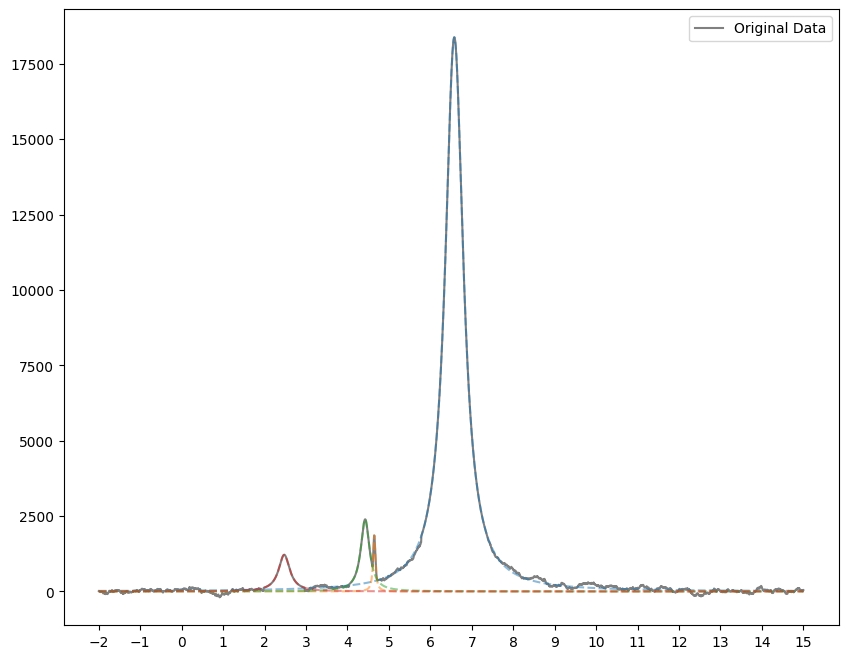

In [31]:
# bring the data back to the cpu
data_train_tensor = data_train_tensor.to("cpu")
data_val_tensor = data_val_tensor.to("cpu")
data_test_tensor = data_test_tensor.to("cpu")

target_train_tensor = target_train_tensor.to("cpu")
target_val_tensor = target_val_tensor.to("cpu")
target_test_tensor = target_test_tensor.to("cpu")

data_train_tensor = data_train_tensor.squeeze(1)
data_val_tensor = data_val_tensor.squeeze(1)
# scale the data back
data_train = data_scaler.inverse_transform(data_train_tensor)
data_val = data_scaler.inverse_transform(data_val_tensor)
target_train = target_scaler.inverse_transform(target_train_tensor)


print(f'data_train: {data_train.shape}')
print(f'data_val: {data_val.shape}')
print(f'target_train: {target_train.shape}')

print(f'len substrates_list: {len(substrates_list)}')


x0_parms_train, gamma_parms_train, height_parms_train = np.split(target_train, 3, axis=1)
x0_parms_val, gamma_parms_val, height_parms_val = np.split(target_val, 3, axis=1)
x0_parms_test, gamma_parms_test, height_parms_test = np.split(target_test, 3, axis=1)




n = 10
x = x_data[n]
# plot the data
#plt.plot(x, data_train[n, :], '-', label='Original Data')
# for x0, gamma, height in zip(x0_parms_train[n], gamma_parms_train[n], height_parms_train[n]):
#     lorentz = lorentzian(x, x0, gamma, height)
#     plt.plot(x, lorentz, '--', label='Original Peaks', alpha=0.5)

# plt.plot(x, data_val[n, :], '-', label='Original Data', color='grey')
# for x0, gamma, height in zip(x0_parms_val[n], gamma_parms_val[n], height_parms_val[n]):
#     lorentz = lorentzian(x, x0, gamma, height)
#     plt.plot(x, lorentz, '--', label='Original Peaks', alpha=0.5)   
    
fig = plt.figure(figsize=(10, 8))

plt.plot(x, data_test[n, :], '-', label='Original Data', color='grey')
for x0, gamma, height in zip(x0_parms_test[n], gamma_parms_test[n], height_parms_test[n]):
    lorentz = lorentzian(x, x0, gamma, height)
    plt.plot(x, lorentz, '--', alpha=0.5)

plt.xticks(np.arange(-2, 16, 1))
plt.legend()
plt.show()

# Validate on real Data

In [32]:
# # Use a dataframe to collect general evaluation results
# results = pd.DataFrame()

# # We will reuse this function. Hence we copy it to mads_dl.py
# def add_regression_eval(results, algorithm, y_train, y_train_pred, y_test, y_test_pred, num_params):
#     '''
#     Create a table with evaluation results
#     of a regression experiment
#     '''
#     for dataset, actual, predicted in zip(("train", "test"), (y_train, y_test), (y_train_pred, y_test_pred)):
#         mse=mean_squared_error(actual, predicted)
#         results= pd.concat([results, pd.DataFrame([{
#             "algorithm": algorithm, 
#             "dataset": dataset,
#             "MSE": mse,
#             "RMSE": math.sqrt(mse),
#             "MAE": mean_absolute_error(actual, predicted),
#             "MAPE": mean_absolute_percentage_error(actual, predicted)*100, # implemented is relative to 1 not to 100
#             "params": num_params
#         }])], ignore_index=True)   
#     return results


# Test on Data

(1, 3000)


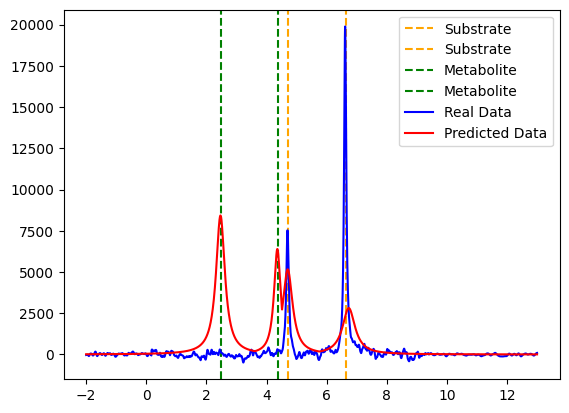

(1, 3000)


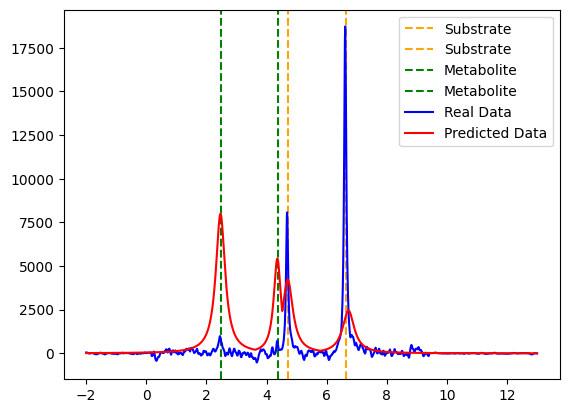

(1, 3000)


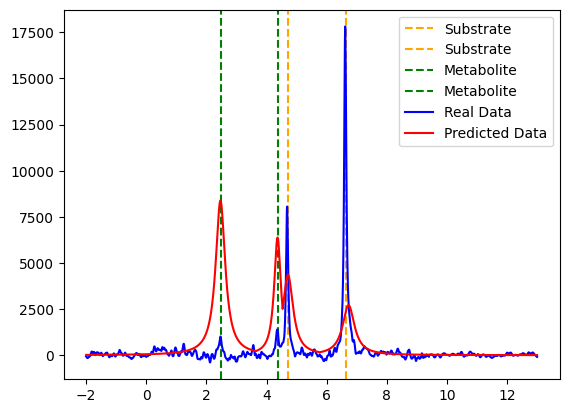

(1, 3000)


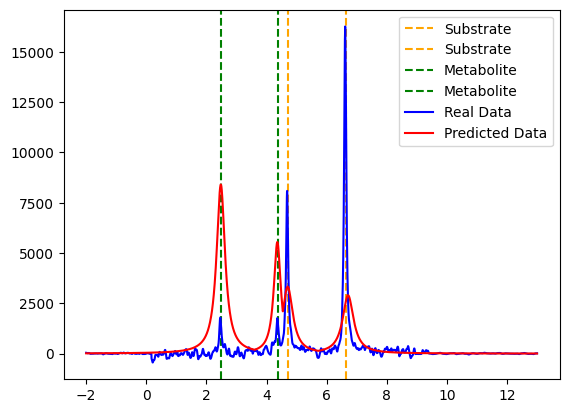

(1, 3000)


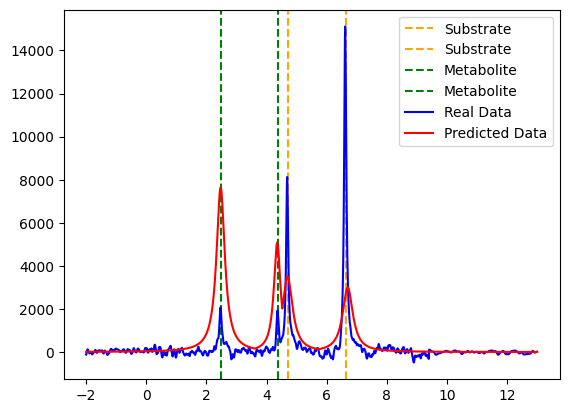

(1, 3000)


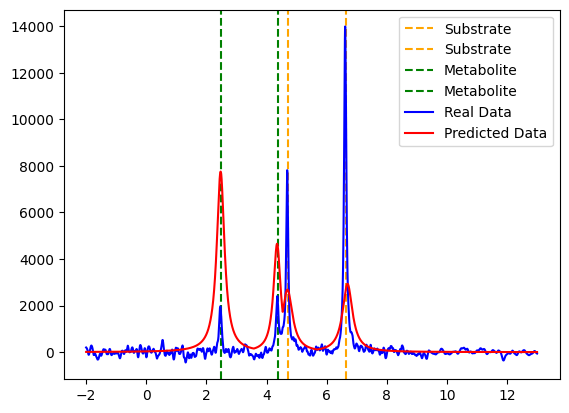

(1, 3000)


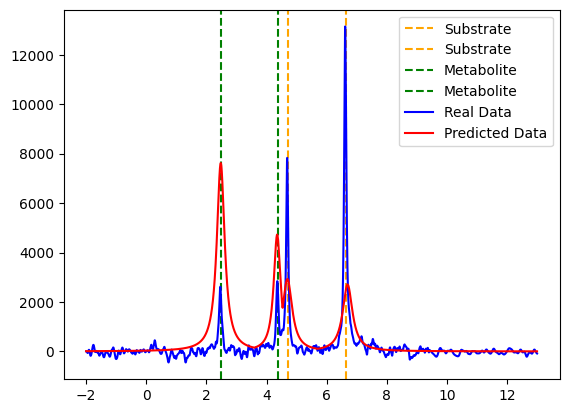

(1, 3000)


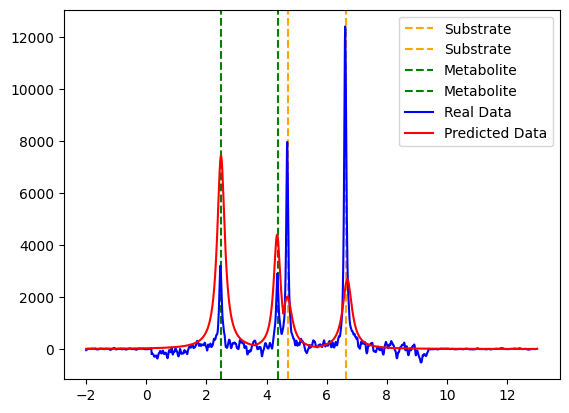

(1, 3000)


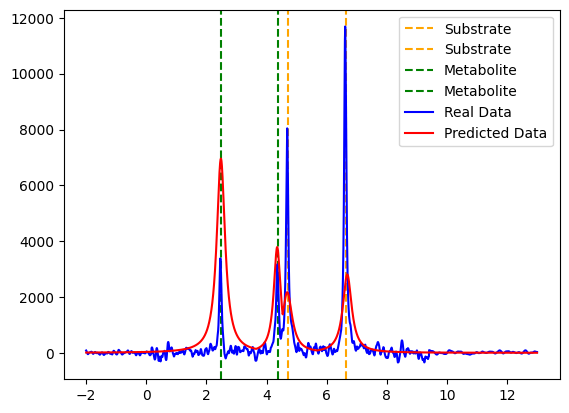

In [33]:
df = pd.read_csv(path_list[0]) 

for i in range(1, 10):
    # fill the data
    df_fill = fill_df(df.iloc[:, [0, i]])

    # interpolate the data
    df_interpolated = interpolate_to_shape(df_fill.iloc[:, 0], df_fill.iloc[:, 1], spectrum_lenth=3000)
    #display(df_interpolated)
    x_real = df_interpolated.loc[:, 'x']
    y_real = df_interpolated.loc[:, 'y']

    # scale the data
    y_real_sc = data_scaler.transform(y_real.values.reshape(1, -1))
    print(y_real_sc.shape)

    # convert to tensor
    y_real_tensor = torch.tensor(y_real_sc, dtype=torch.float32)

    # predict the data
    target_real_pred = model.predict(y_real_tensor)

    # bring the data back to the cpu
    target_real_pred = target_real_pred.cpu().detach().numpy()

    # rescale the data
    target_real_pred_rescaled = target_scaler.inverse_transform(target_real_pred)

    # reshape the data
    target_real_pred = target_real_pred_rescaled.reshape(target_real_pred_rescaled.shape[0], -1)

    x0_parms_real, gamma_parms_real, height_parms_real = np.split(target_real_pred, 3, axis=1)

    # calcualte the mse
    #mse = calculate_mse_of_real_data(df, model, random=False, i=i)
    #print(mse)
    
    # Put the Lorenz functions in a Dataframe
    lorentz_list = []
    lorentz_df = pd.DataFrame({'x': x_real})  # Initialize DataFrame with x_real

    for i, (x0, gamma, height) in enumerate(zip(x0_parms_real[0], gamma_parms_real[0], height_parms_real[0])):
        lorentz = lorentzian(x_real, x0, gamma, height)
        column_name = f'lorentz_{i}'  # Dynamically generate a unique column name
        lorentz_df = pd.concat([lorentz_df, pd.DataFrame({column_name: lorentz})], axis=1)

    # add another column which takes the np.maximum of the columns
    lorentz_df['max'] = lorentz_df.iloc[:, 1:].max(axis=1)
    #display(lorentz_df)
    


    for subs in substrates:
        plt.axvline(x=subs, color='orange', linestyle='--', label='Substrate')

    for metab in metabolites:
        plt.axvline(x=metab, color='green', linestyle='--', label='Metabolite')

    plt.plot(x_real, y_real, label='Real Data', color='blue')
    plt.plot(x_real, lorentz_df['max'], label='Predicted Data', color='red')


    plt.legend()
    plt.show()

In [34]:
substrates, metabolites

([6.653, 4.7], [4.368, 2.474])